In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Importing data csv file
df=pd.read_excel("D:/DATA SCIENCE & ANALYST (Projects,Assignments,Preparations)/Project.(#DS# Bankruptcy & Sentimental Analysis)_Prasanna/Customer Segmentation Analysis Project_Prasanna/marketing_campaign (1).xlsx")

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
# Checking type of data
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [5]:
# Checking column names
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Renaming Column name
df = df.rename(columns={'Income?':'Income'})

In [7]:
# Rechecking column names
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
# Checking for null values in df
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
# Checking for duplicates in df
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [10]:
# Rechecking for duplicates
df.loc[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [11]:
# Checking for NAN values in df
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [12]:
# Computing the descriptive statistics of our features
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [14]:
numeric_features = df.dtypes[df.dtypes != 'int64'].index
categorical_features = df.dtypes[df.dtypes == 'int64'].index

df[categorical_features].columns.tolist()

['ID',
 'Year_Birth',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [15]:
df['Income'].value_counts()

Income
7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: count, Length: 1974, dtype: int64

In [16]:
df["Income"].skew()  #right skewed distribution

6.763487372811116

In [17]:
df["Income"].kurt() #leptokurtic (tall distribution)

159.6366995778005

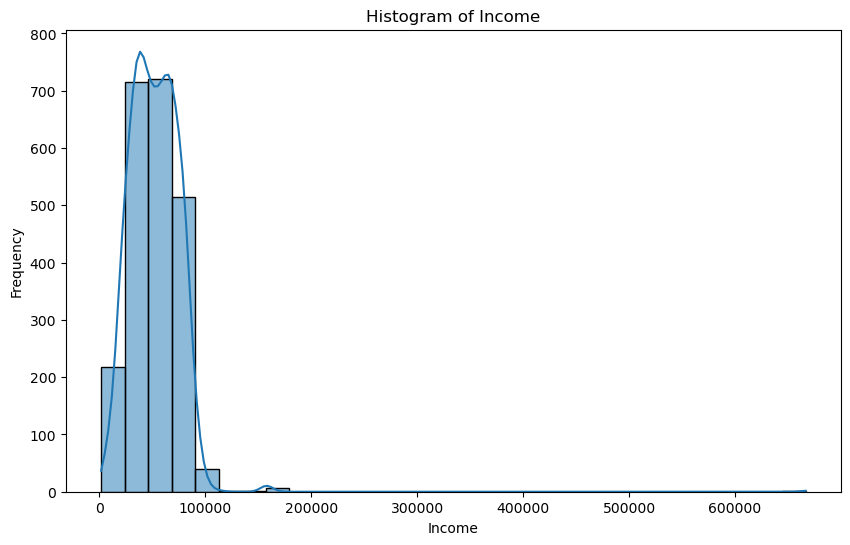

In [18]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

C:\Users\prasa\AppData\Local\Temp\ipykernel_11628\1363291500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"])


<Axes: xlabel='Income', ylabel='Density'>

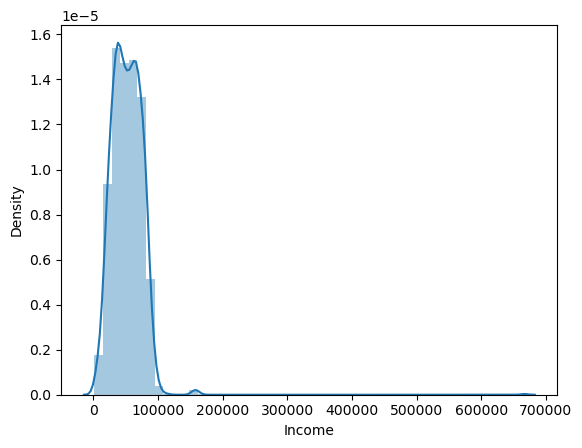

In [19]:
sns.distplot(df["Income"])

In [20]:
df["Income"].fillna(df["Income"].median(),inplace=True)

In [21]:
df["Income"].isna().sum()

0

In [22]:
df1=df.copy()

In [23]:
#one hot encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder
le=LabelEncoder()

df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])


In [24]:
print(df)

         ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
0      5524        1957          2               4  58138.0        0   
1      2174        1954          2               4  46344.0        1   
2      4141        1965          2               5  71613.0        0   
3      6182        1984          2               5  26646.0        1   
4      5324        1981          4               3  58293.0        1   
...     ...         ...        ...             ...      ...      ...   
2235  10870        1967          2               3  61223.0        0   
2236   4001        1946          4               5  64014.0        2   
2237   7270        1981          2               2  56981.0        0   
2238   8235        1956          3               5  69245.0        0   
2239   9405        1954          4               3  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...            

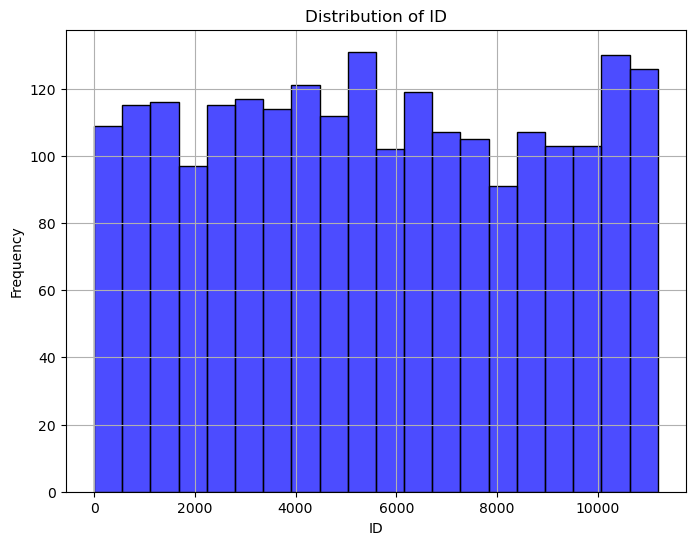

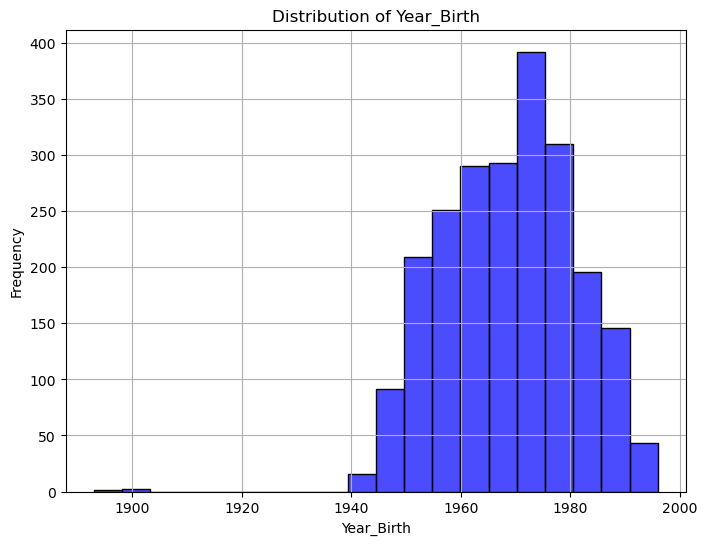

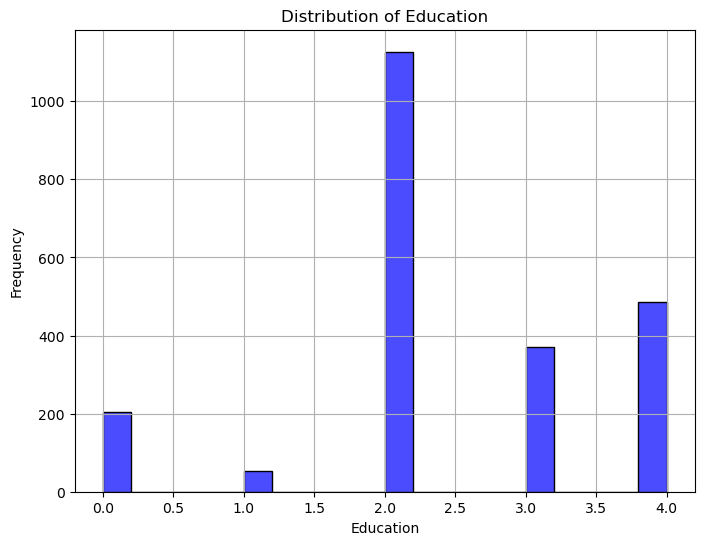

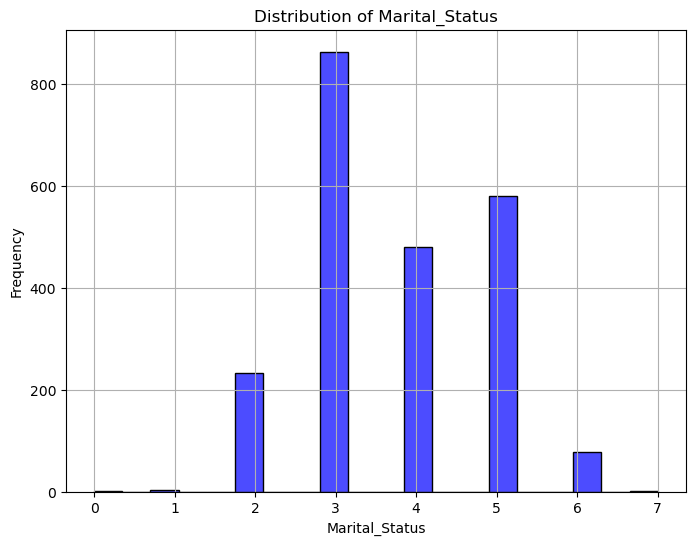

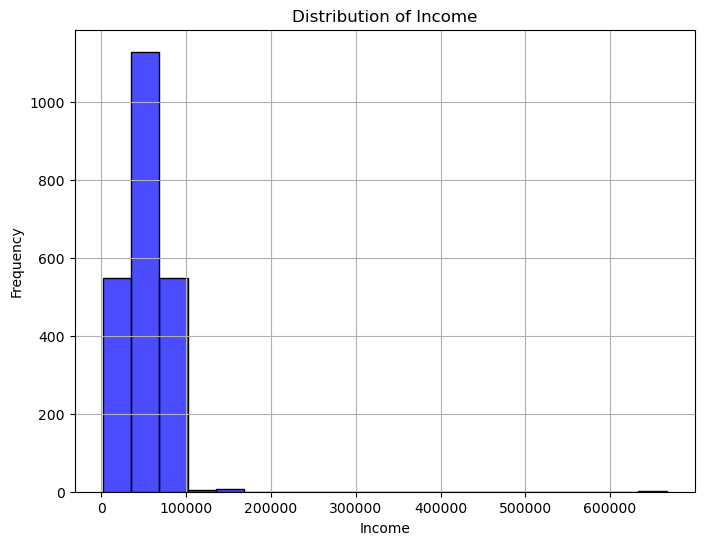

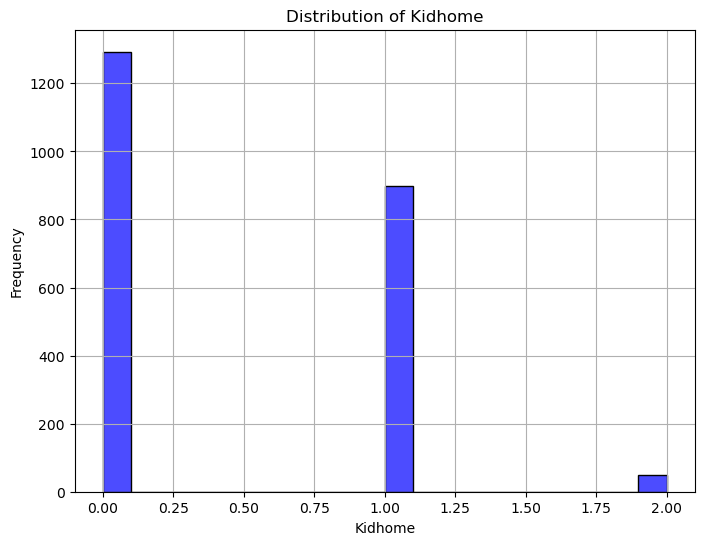

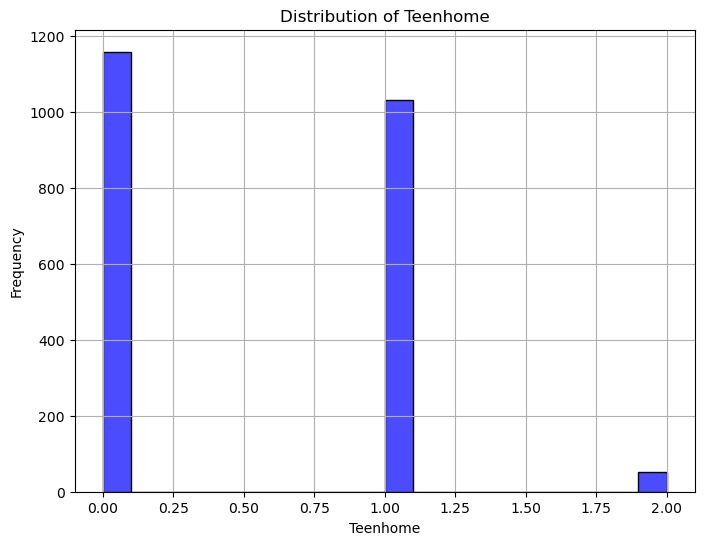

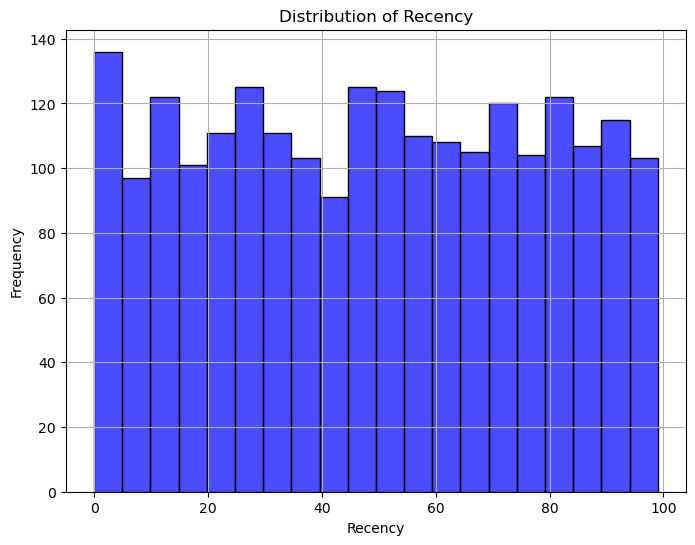

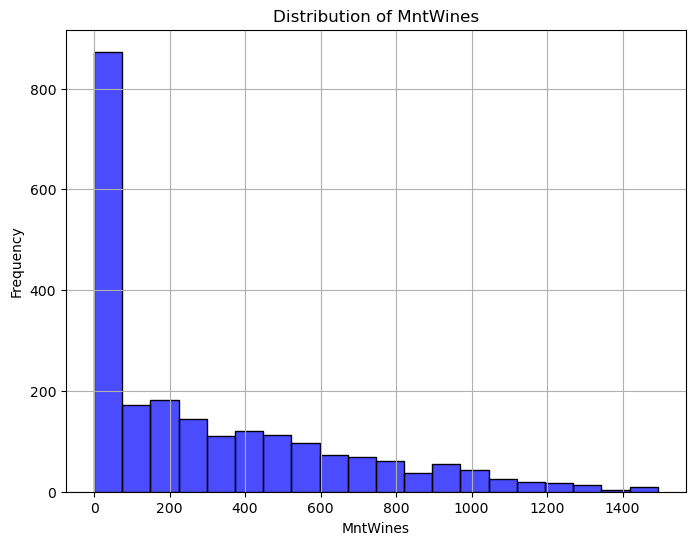

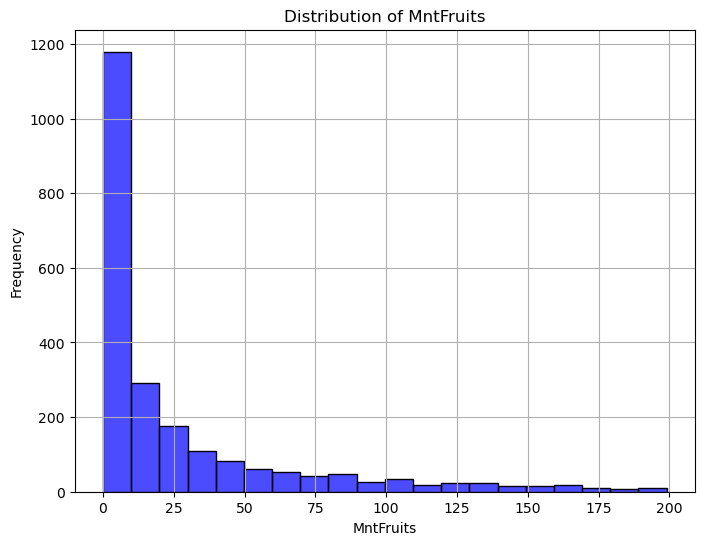

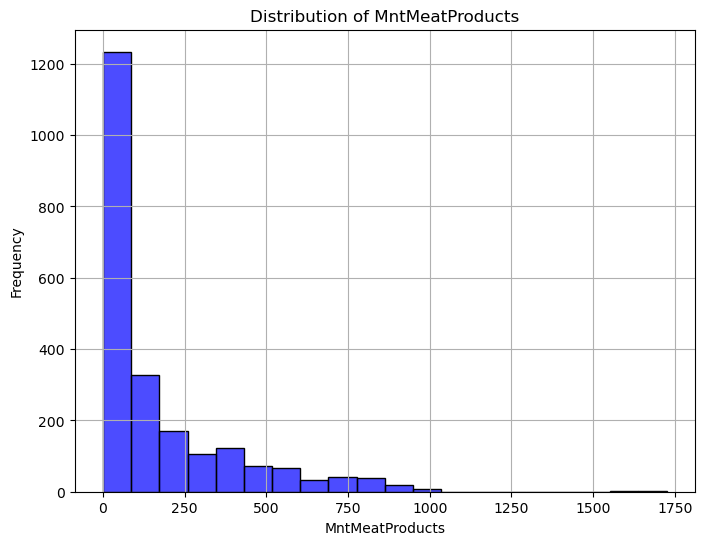

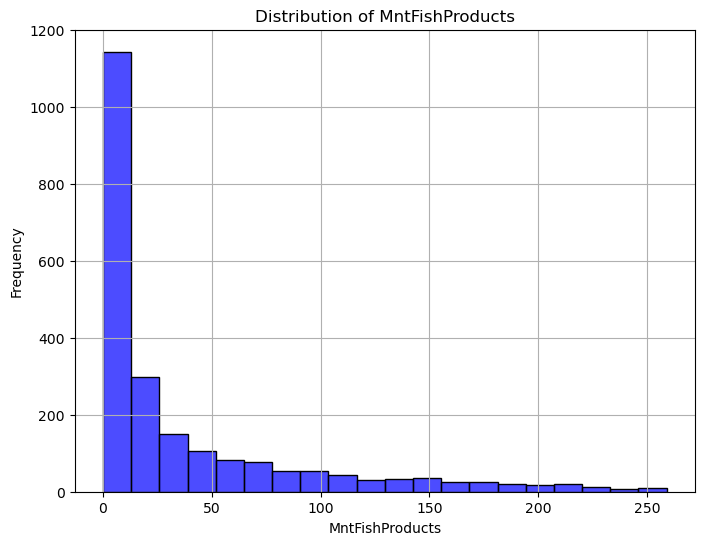

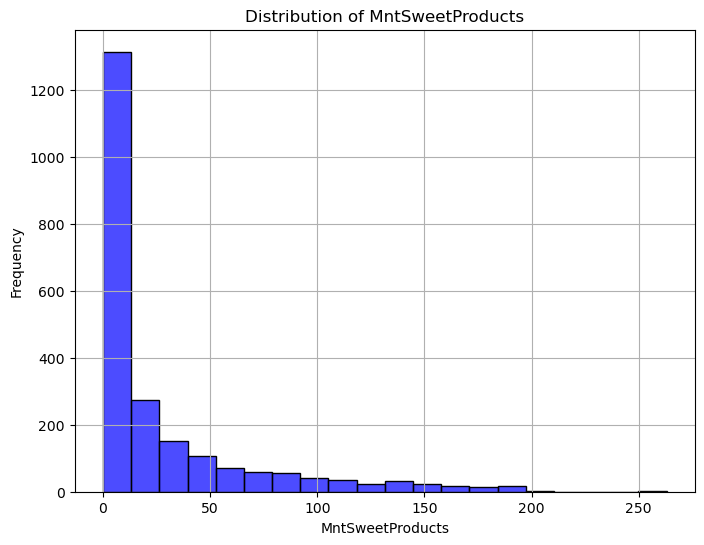

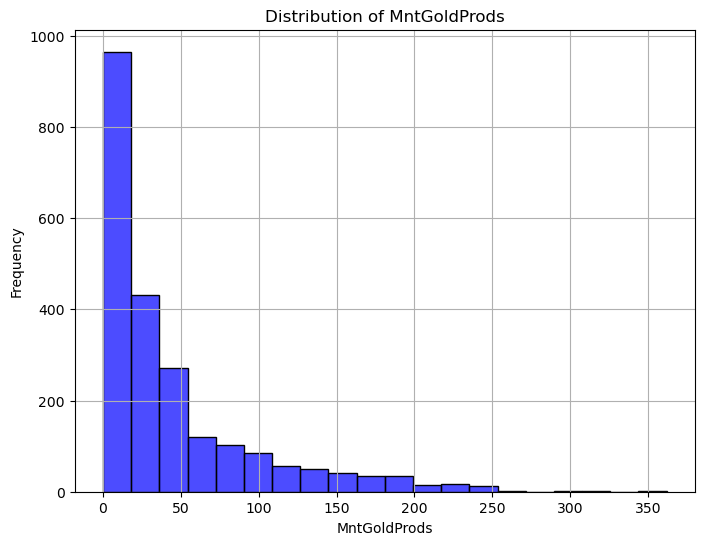

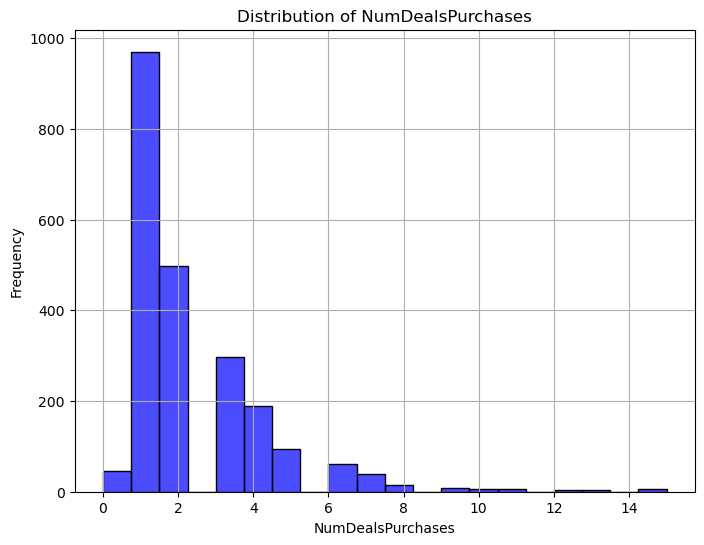

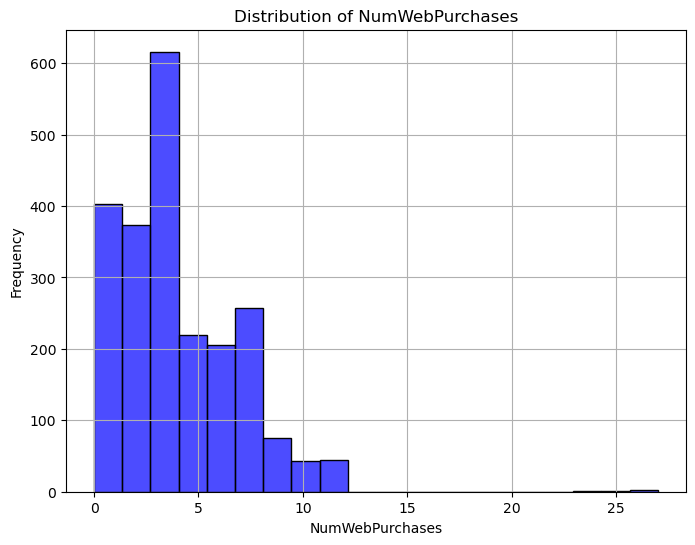

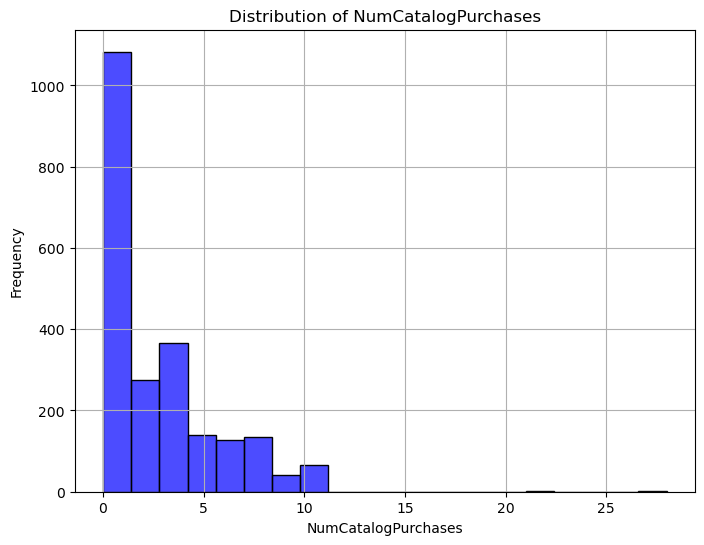

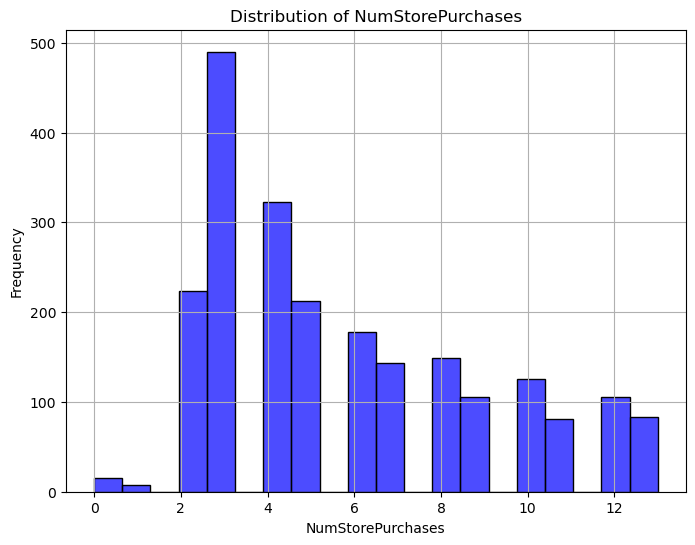

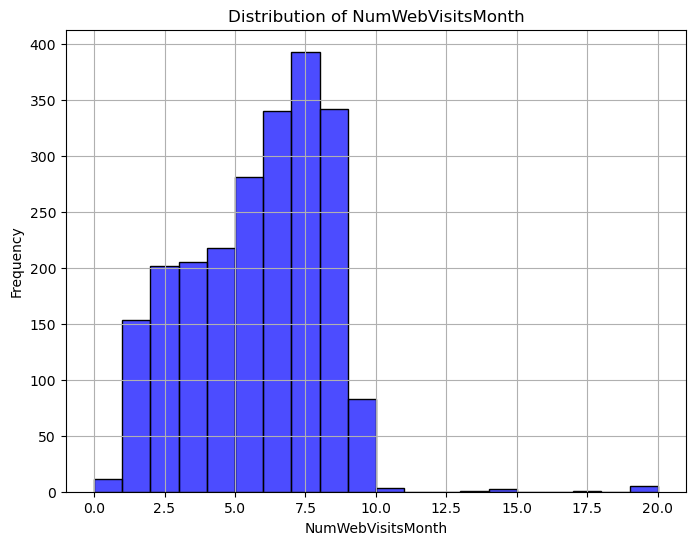

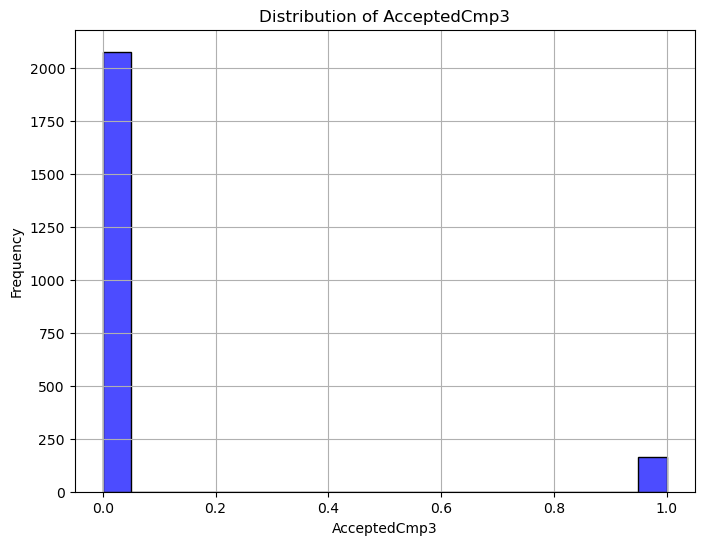

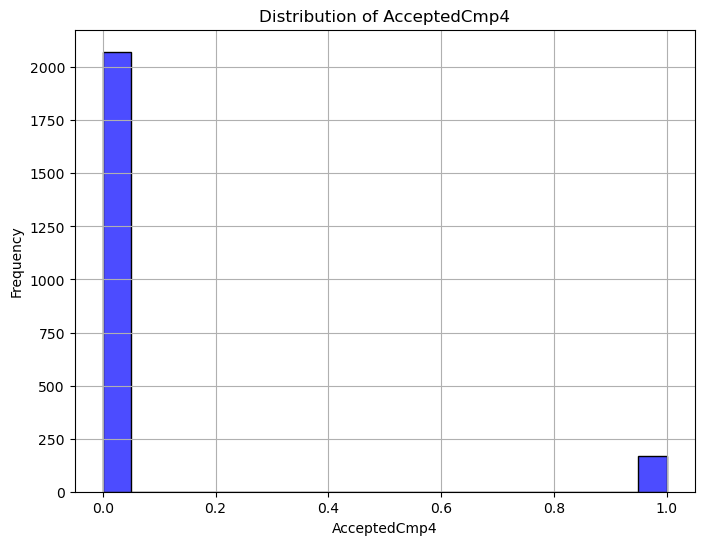

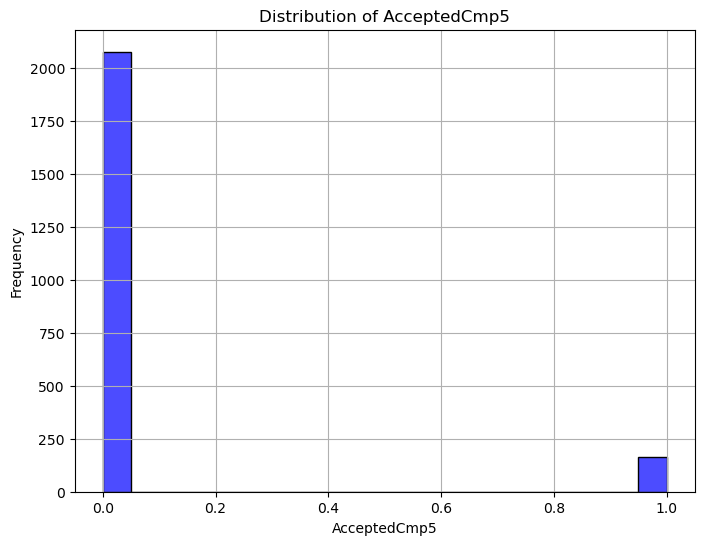

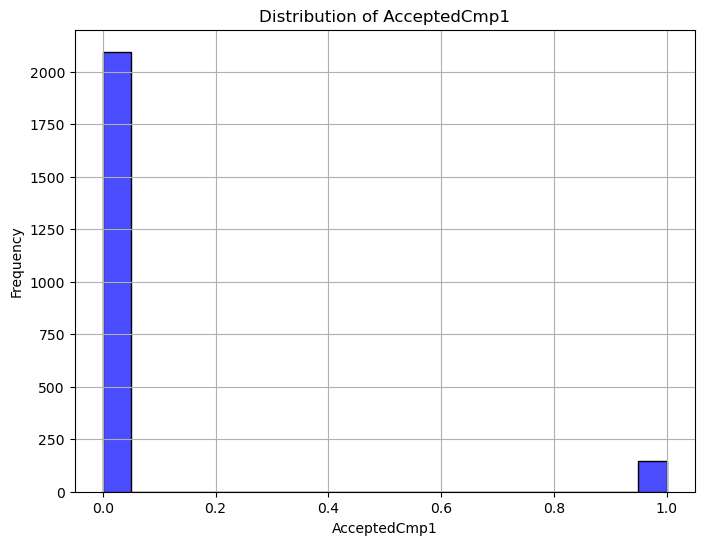

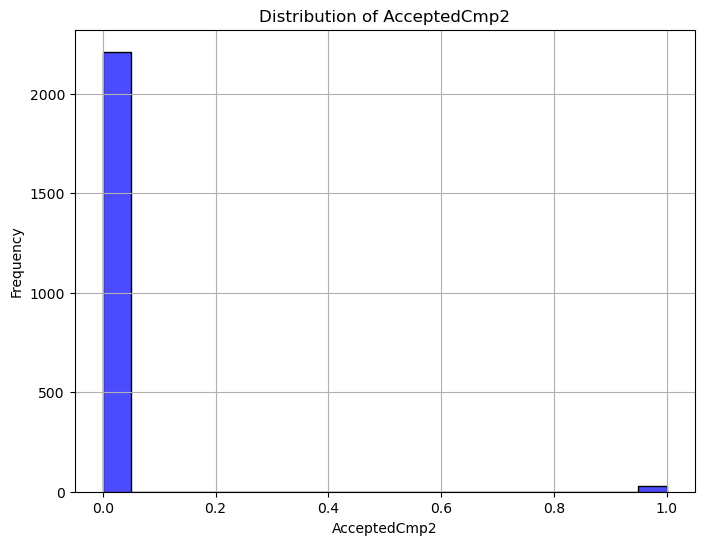

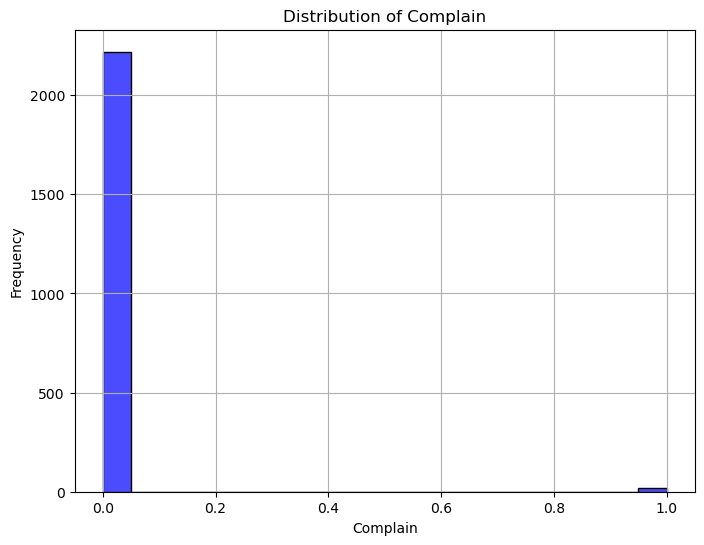

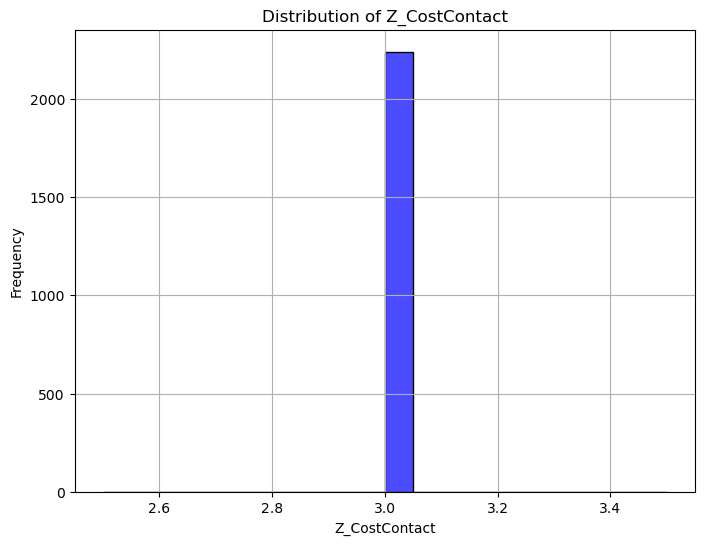

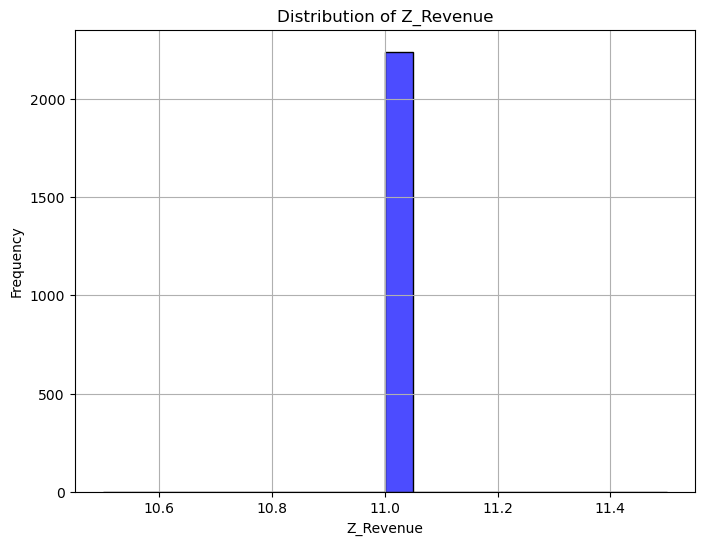

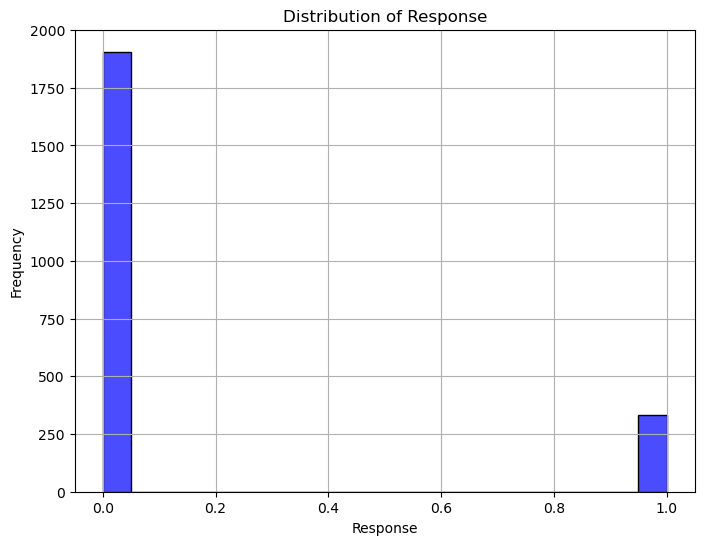

In [25]:
#univariate analysis 
numerical = df.select_dtypes(include=np.number)
for numerical_column in list(numerical):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[numerical_column], bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribution of {numerical_column}')
    plt.xlabel(numerical_column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

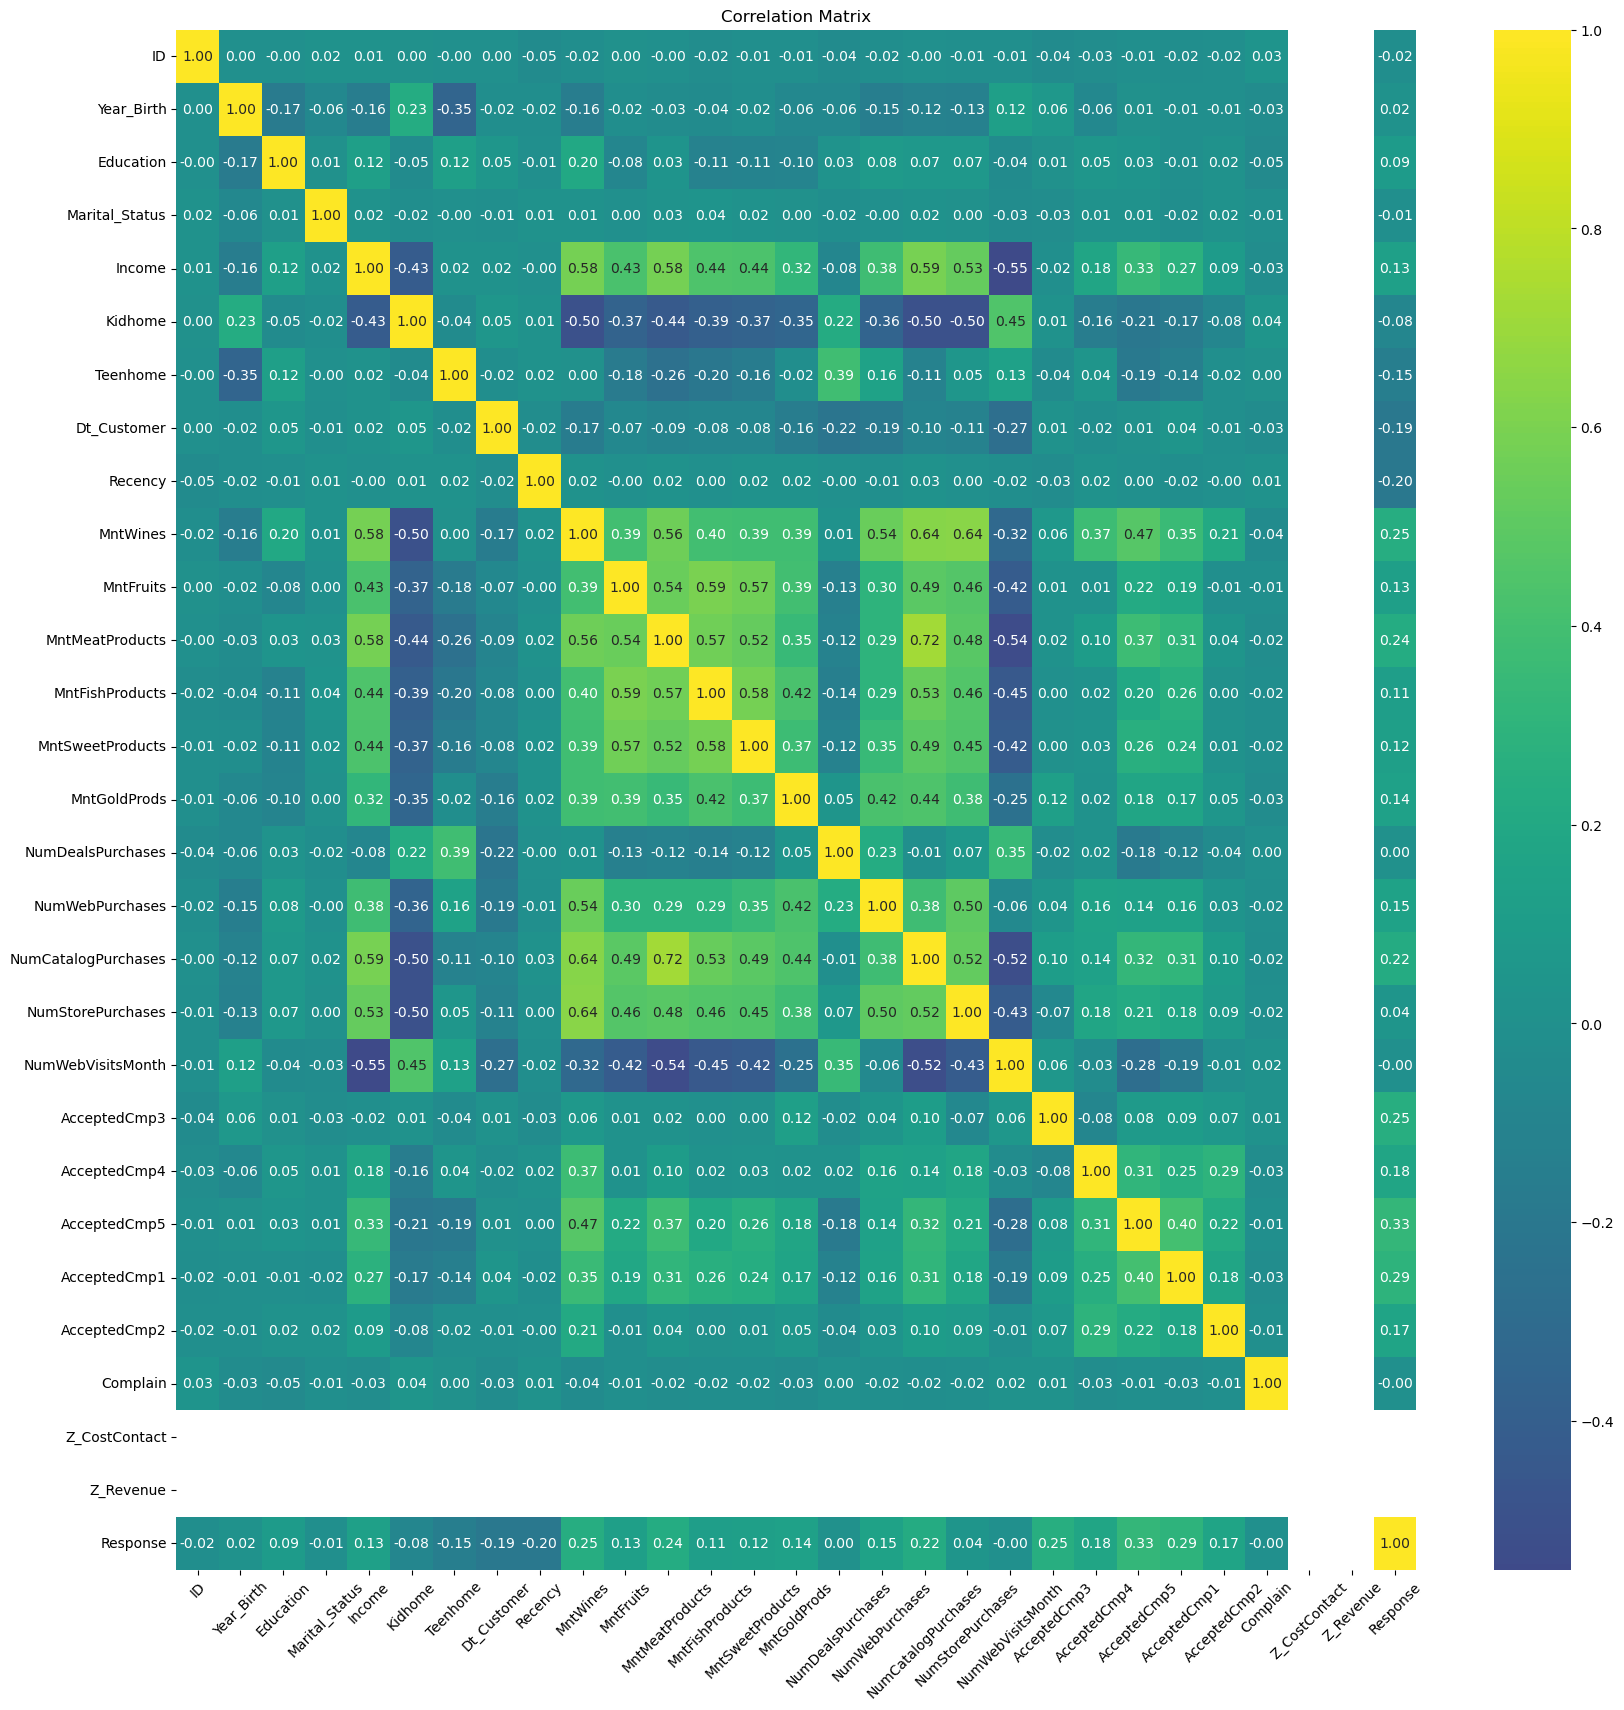

In [26]:
correlation_matrix = df.corr()
#print(correlation_matrix)
plt.figure(figsize=(20,20))  # Adjust the width and height as needed
sns.heatmap(correlation_matrix, annot=True,  center = 0,cmap='viridis', fmt=".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.title('Correlation Matrix')
plt.show()


In [27]:
#drop column
df.drop("Dt_Customer",axis=1,inplace=True)

In [28]:
#feature scaling
from sklearn.preprocessing import StandardScaler
se=StandardScaler()

In [29]:
df[['ID', 'Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']]=se.fit_transform(df[['ID', 'Year_Birth','Income', 'Kidhome',
       'Teenhome','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']])

In [30]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.020999,-0.985345,2,4,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,...,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846
1,-1.053058,-1.235733,2,4,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,-0.447070,-0.317643,2,5,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,...,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,0.181716,1.268149,2,5,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,...,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,-0.082614,1.017761,4,3,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.625983,-0.150717,2,3,0.358936,-0.825218,0.906934,-0.107383,1.203678,0.419916,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2236,-0.490200,-1.903435,4,5,0.470432,2.890335,0.906934,0.237969,0.303291,-0.661449,...,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,0.0,0.0,-0.418612
2237,0.516905,1.017761,2,2,0.189476,-0.825218,-0.929894,1.446700,1.795020,0.545656,...,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2238,0.814199,-1.068807,3,5,0.679401,-0.825218,0.906934,-1.419719,0.368666,0.092992,...,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


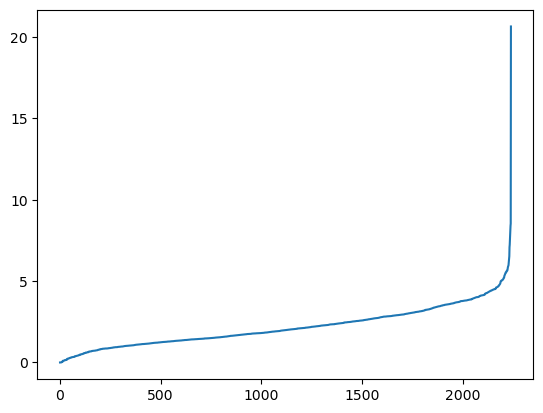

In [31]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=8)  #n_neighbors=8, which specifies that the algorithm should find the 8 nearest neighbors for each point in the dataset.
nbrs=nn.fit(df)
distance,indices=nbrs.kneighbors(df)
distance=np.sort(distance,axis=0)
distance=distance[:,1]
plt.plot(distance)

In [32]:
distance

array([9.24232249e-04, 9.24232249e-04, 2.46461929e-03, ...,
       8.39175054e+00, 8.53842414e+00, 2.06424351e+01])

Skewness of 'Income': 6.796392353073569
Kurtosis of 'Income': 161.03742372306237


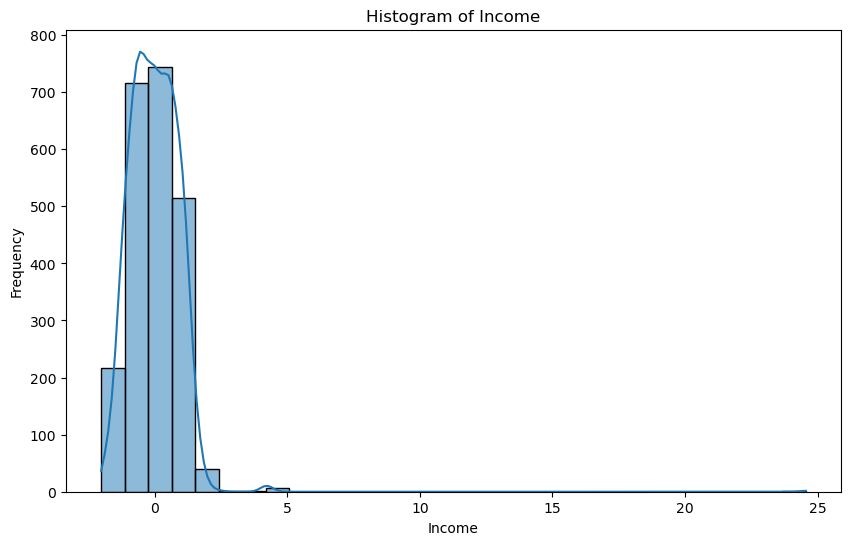


Interpretation:
The high positive skewness (6.325) indicates that the 'Income' distribution is heavily skewed to the right.
This means there are a few individuals with very high incomes that are pulling the tail of the distribution to the right.

The very high kurtosis (147.607) suggests that the 'Income' distribution has heavy tails and a sharp peak compared to a normal distribution.
This implies a higher concentration of values around the mean and more extreme values in the tails.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Calculate skewness
income_skewness = skew(df['Income'])

# Calculate kurtosis
income_kurtosis = kurtosis(df['Income'])

# Print skewness and kurtosis
print(f"Skewness of 'Income': {income_skewness}")
print(f"Kurtosis of 'Income': {income_kurtosis}")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Interpret skewness and kurtosis
print("\nInterpretation:")
print("The high positive skewness (6.325) indicates that the 'Income' distribution is heavily skewed to the right.")
print("This means there are a few individuals with very high incomes that are pulling the tail of the distribution to the right.")

print("\nThe very high kurtosis (147.607) suggests that the 'Income' distribution has heavy tails and a sharp peak compared to a normal distribution.")
print("This implies a higher concentration of values around the mean and more extreme values in the tails.")


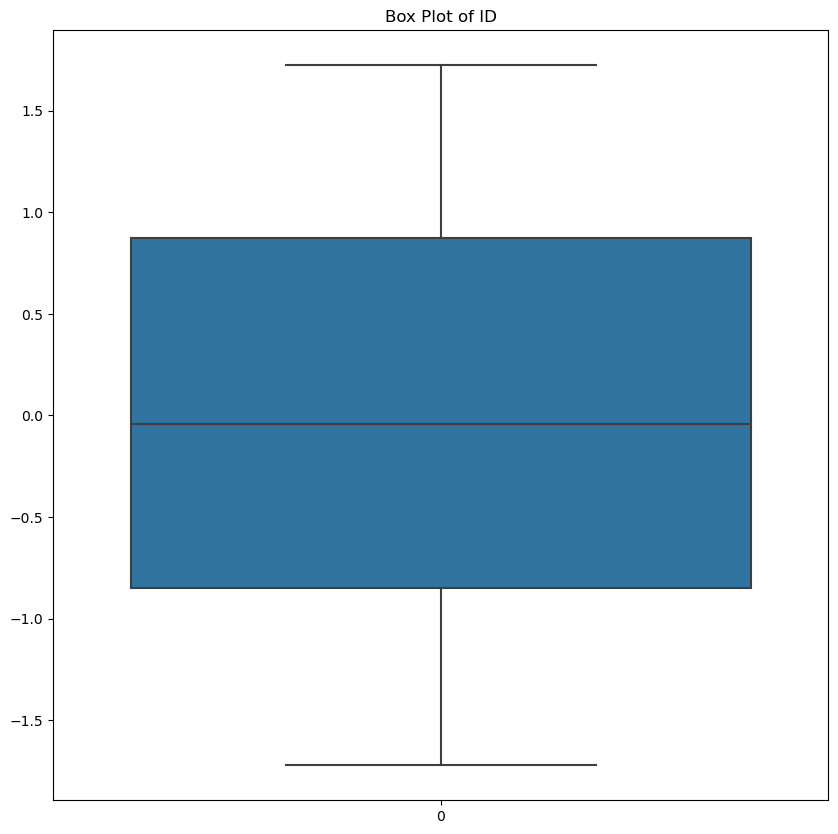

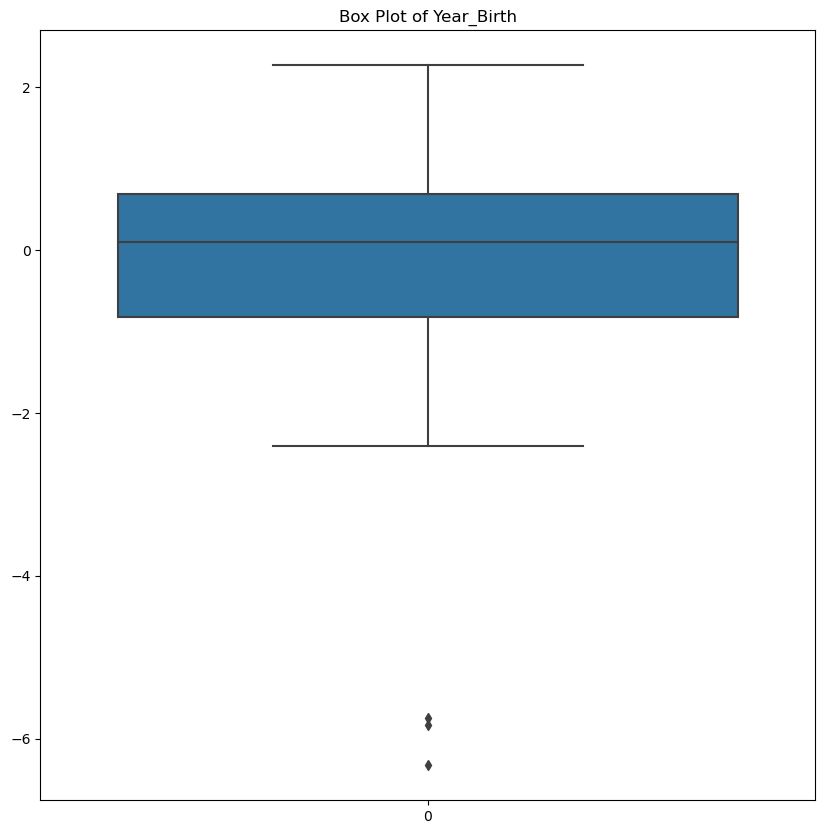

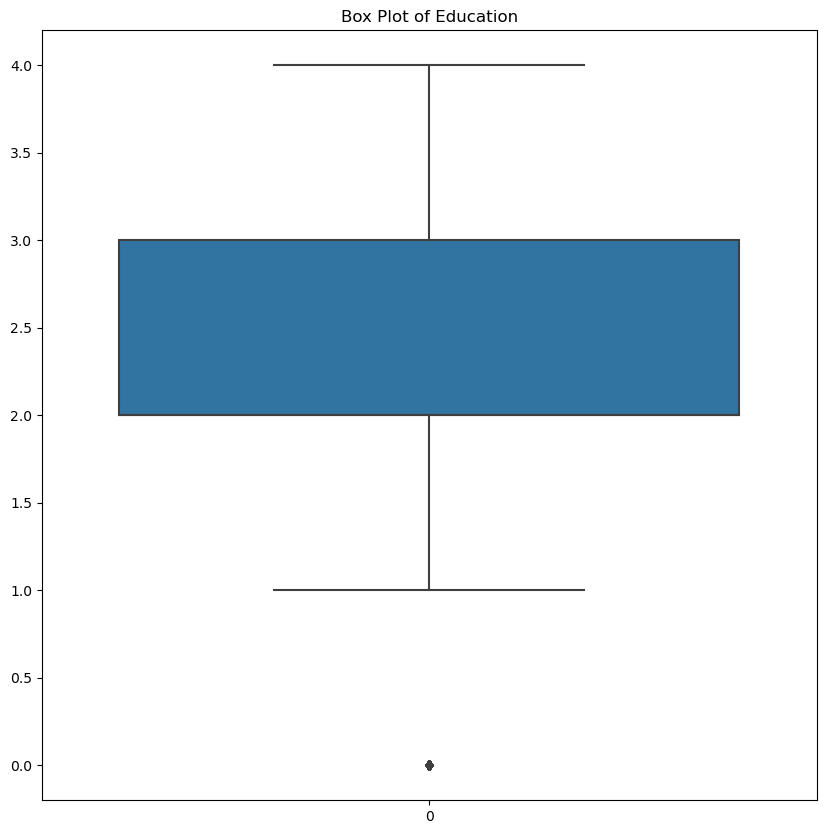

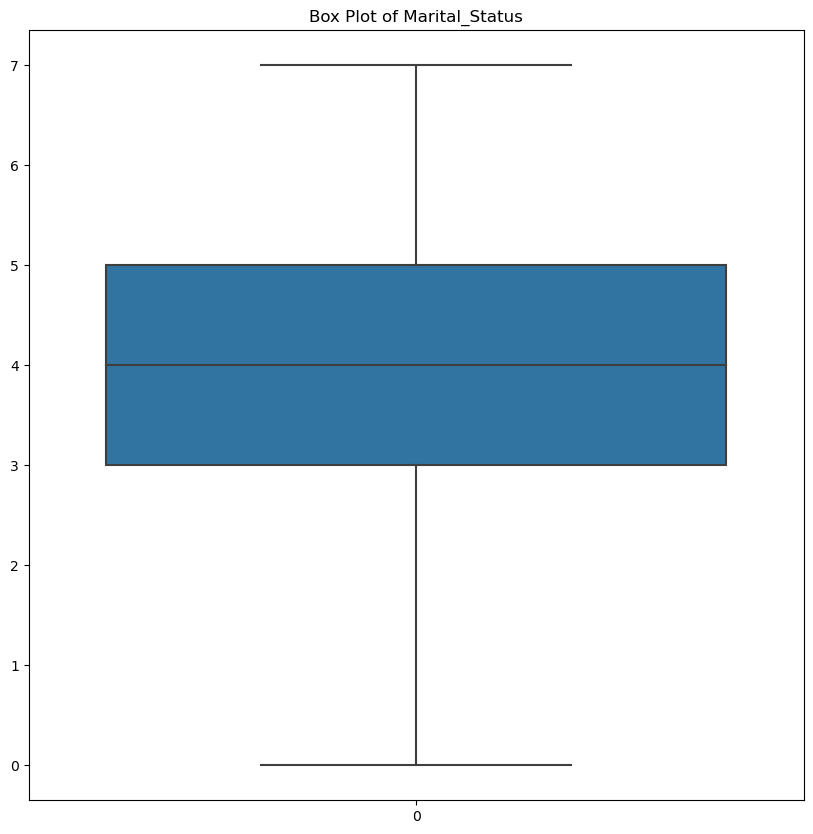

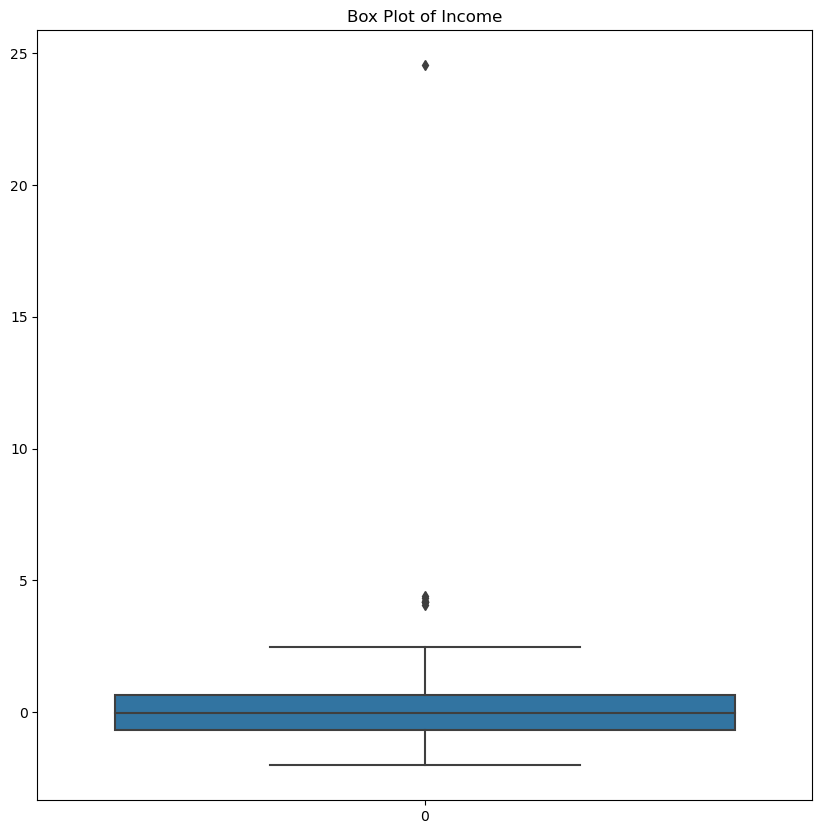

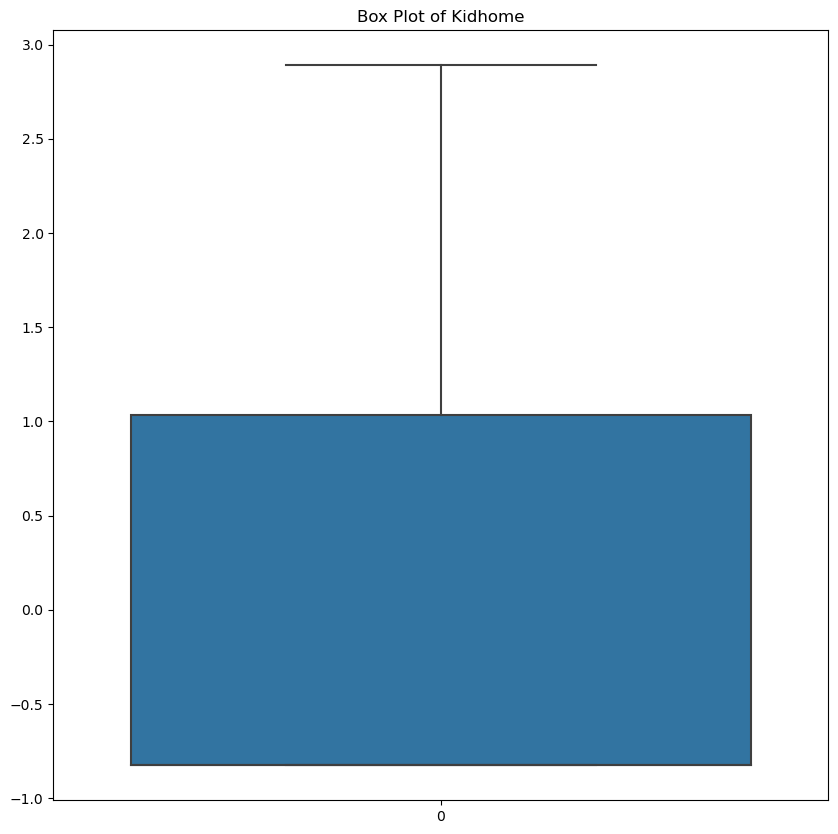

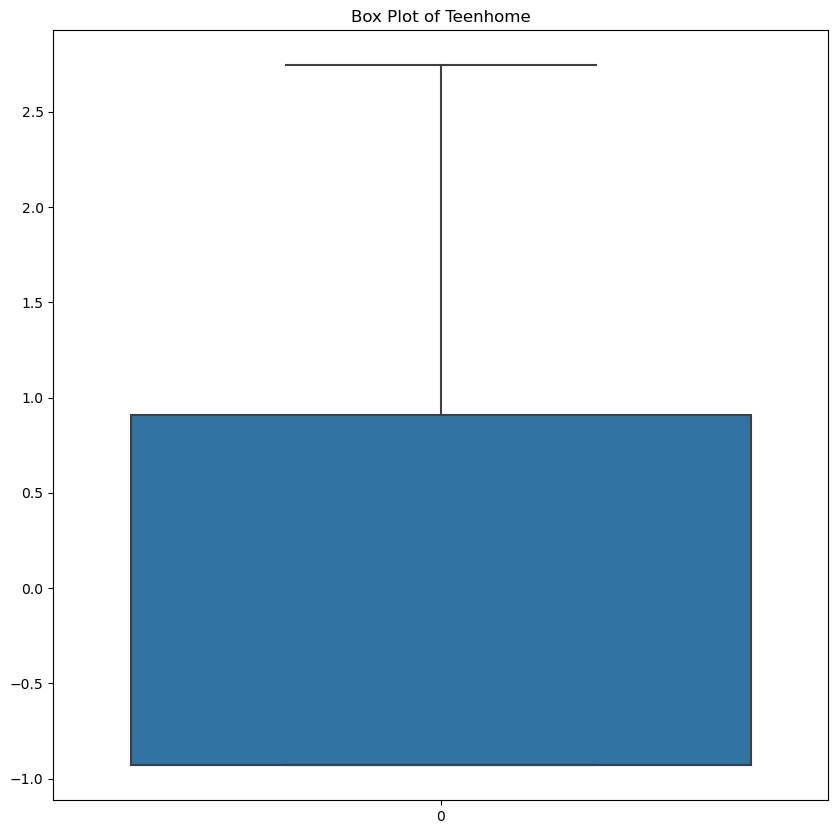

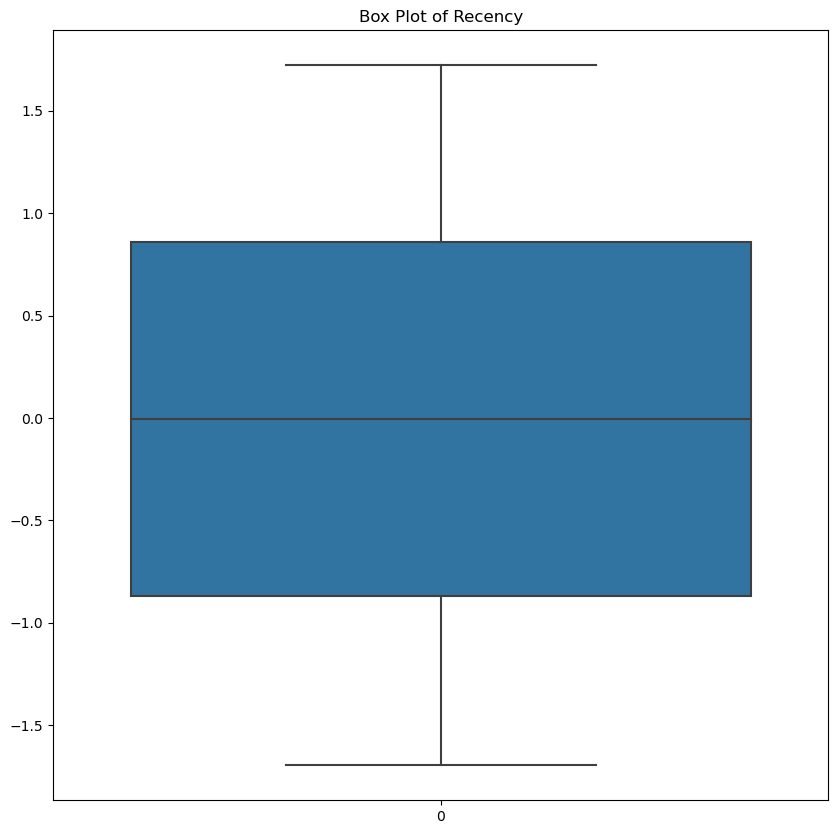

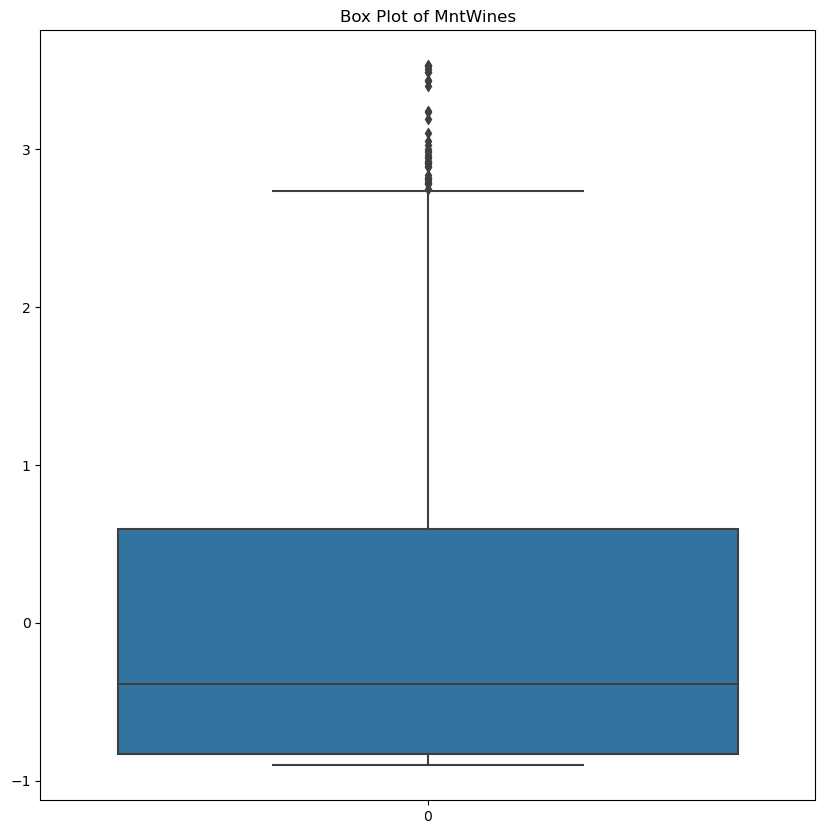

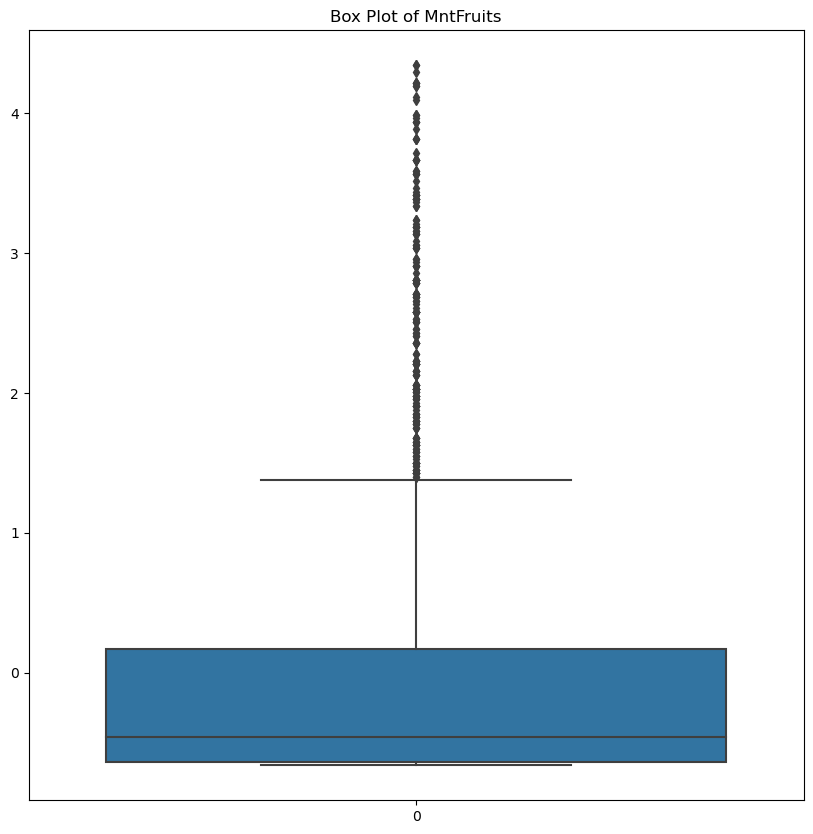

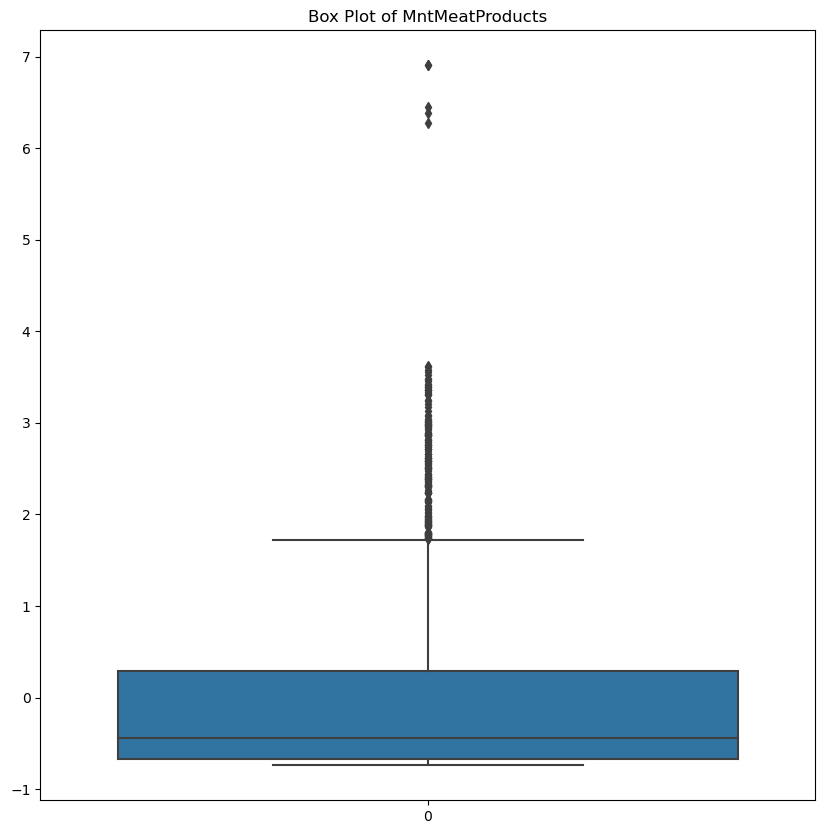

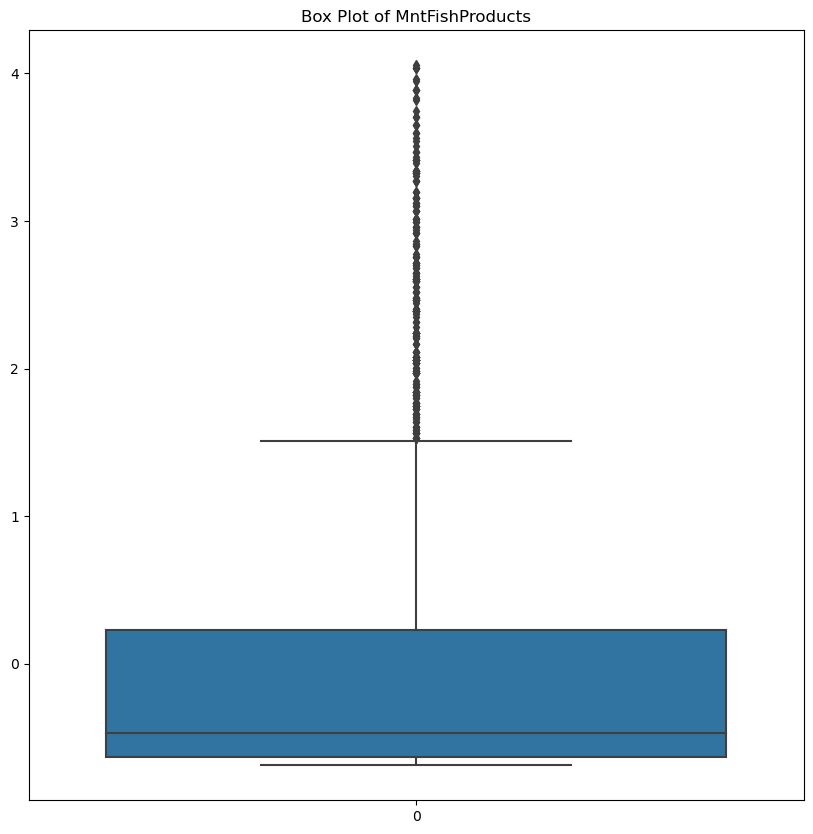

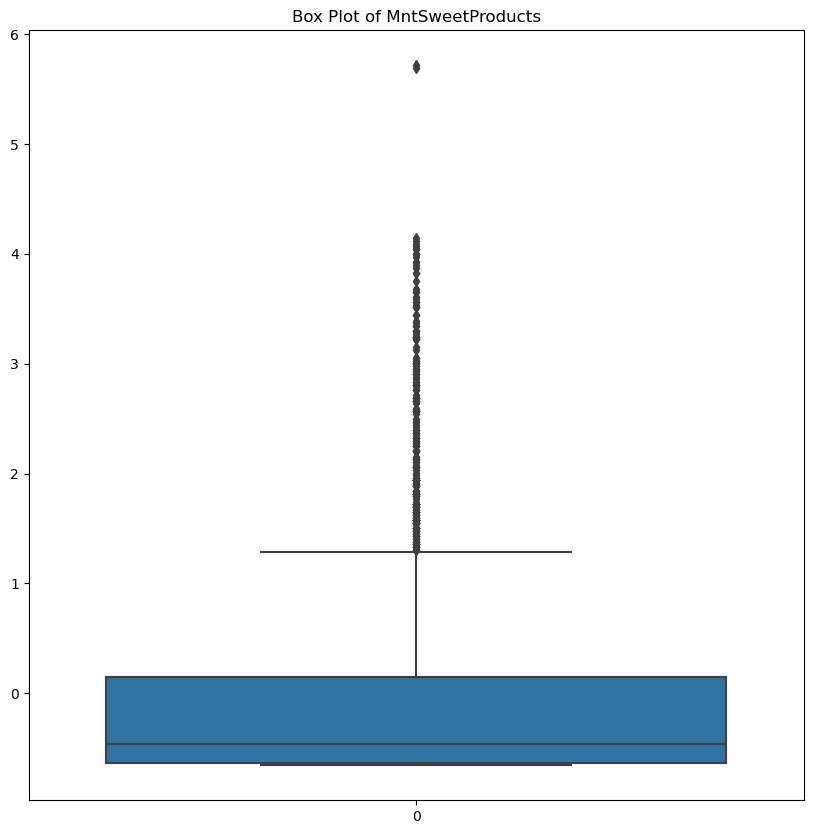

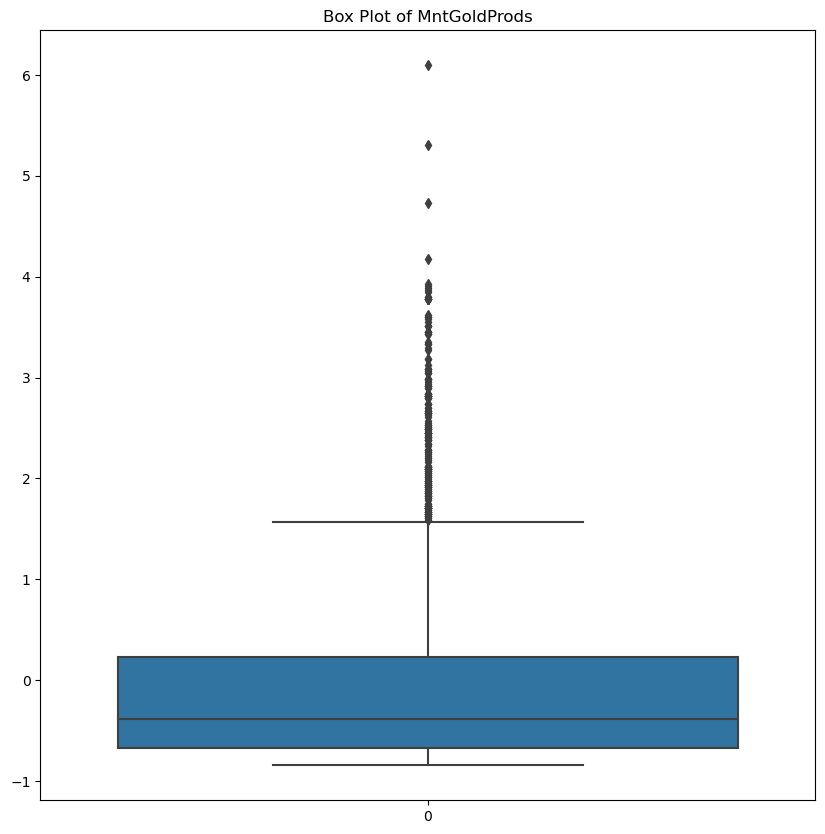

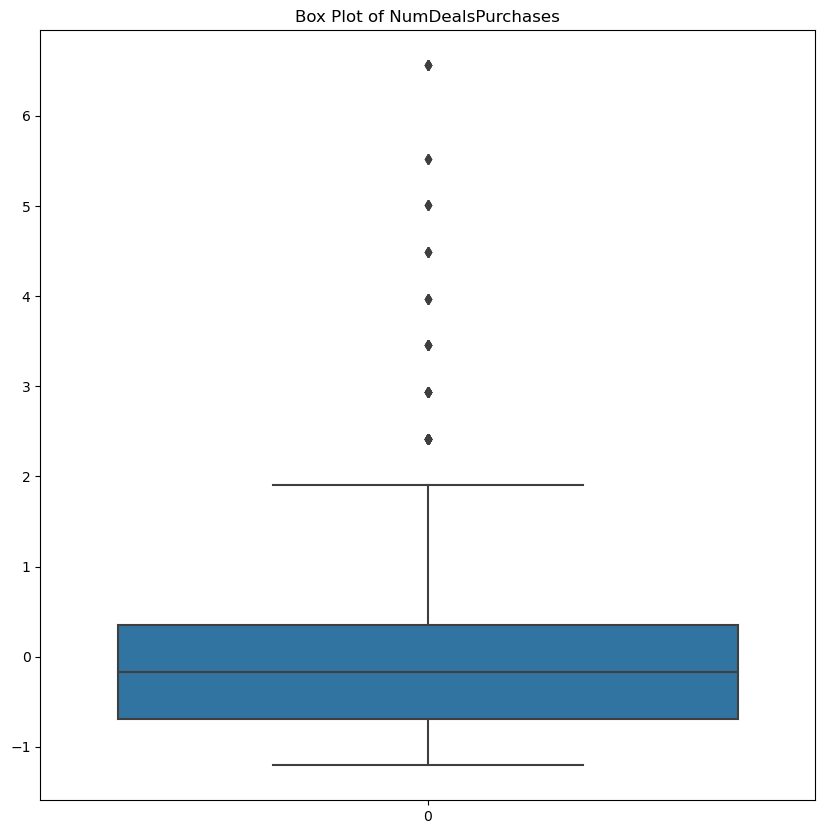

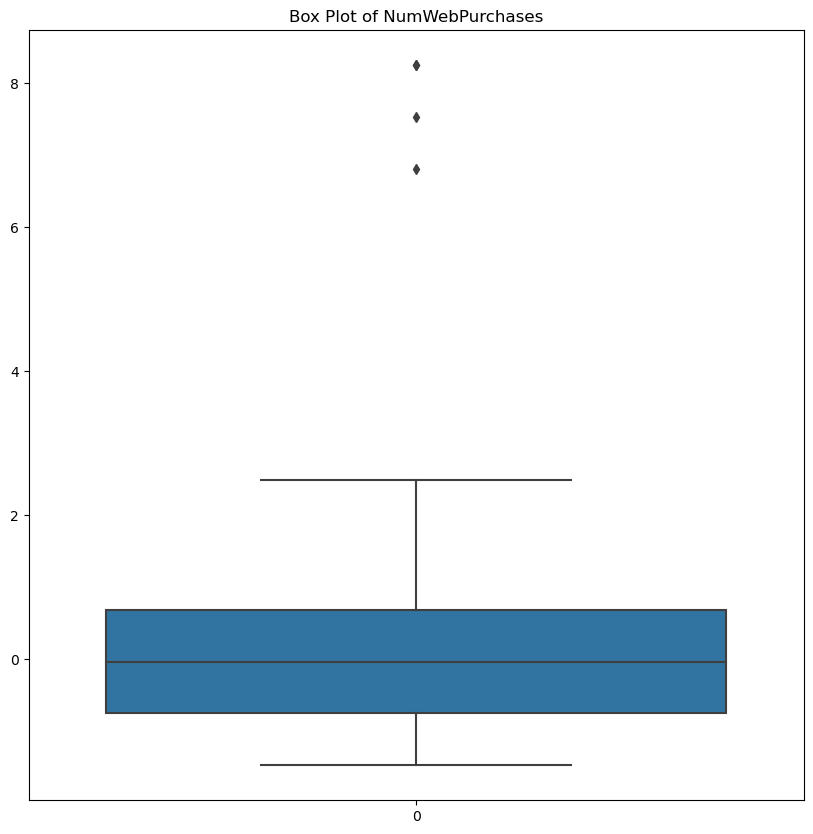

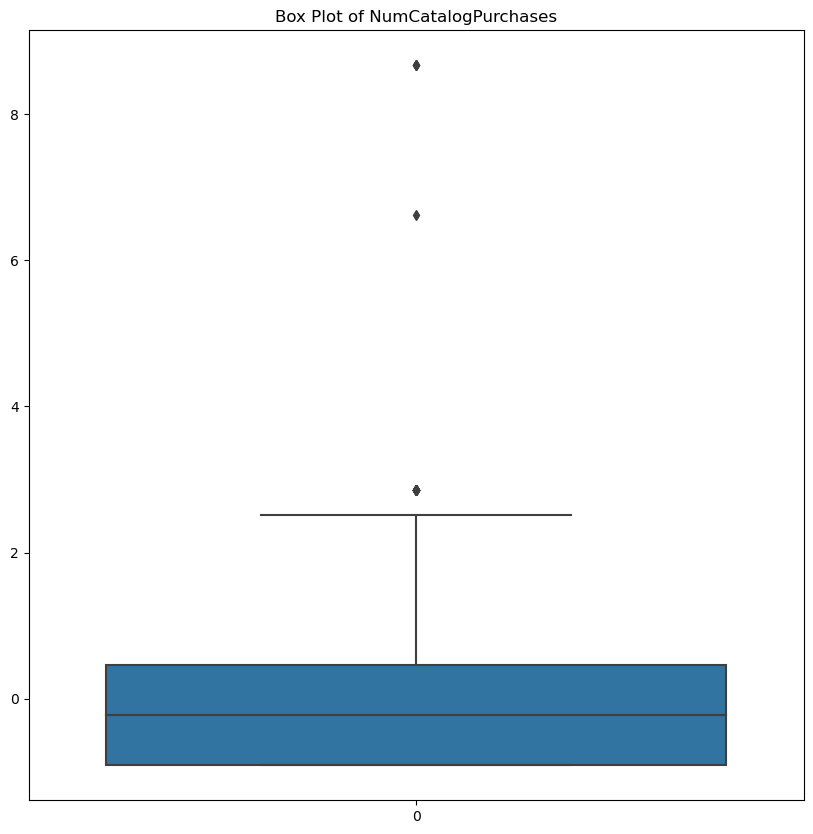

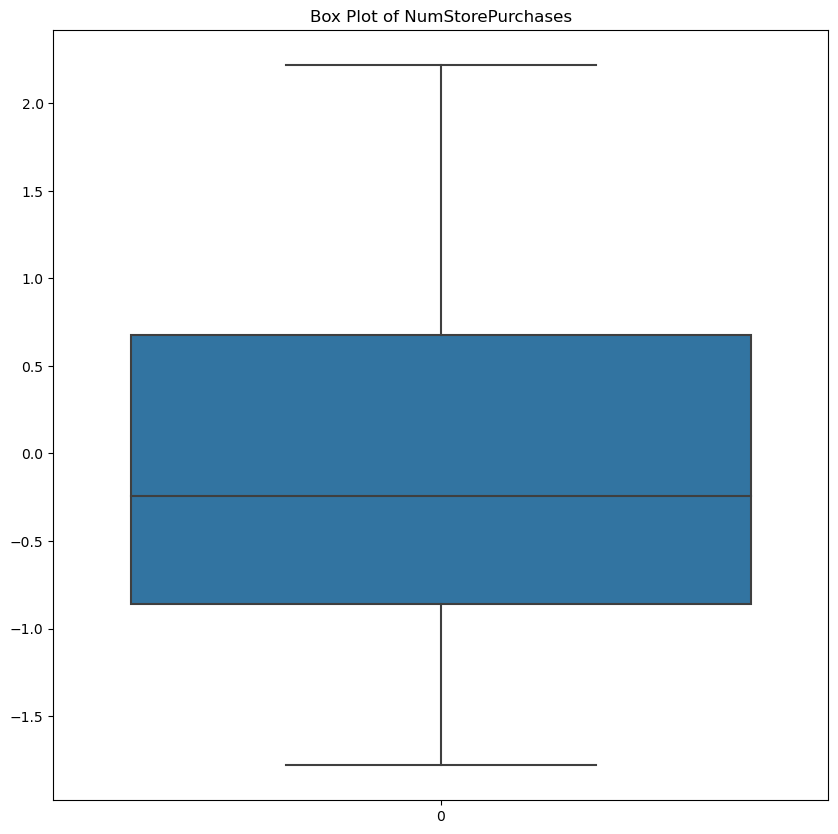

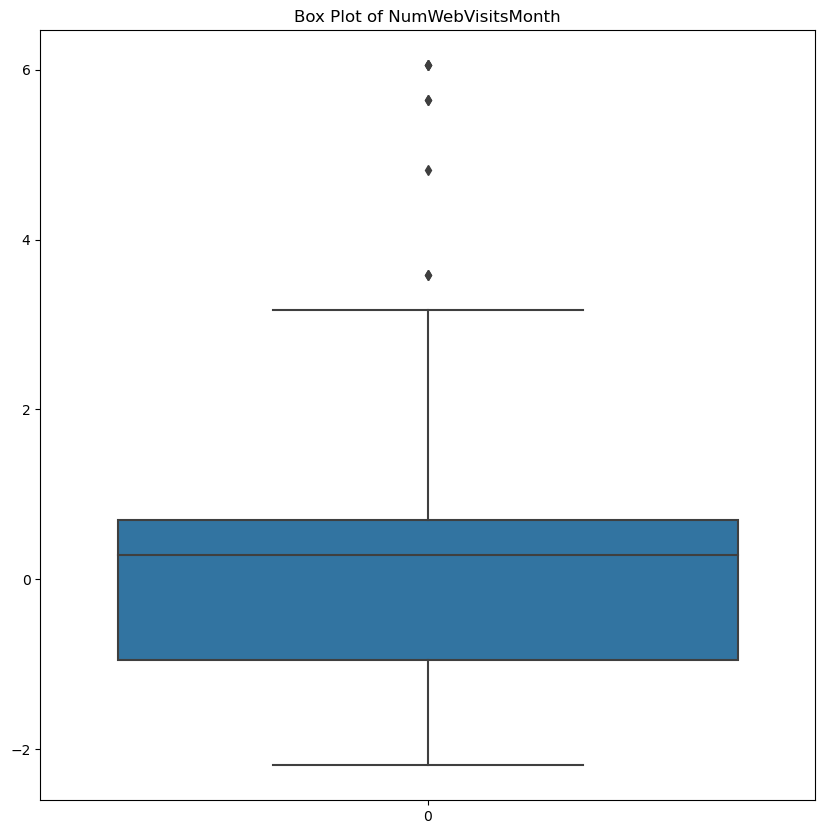

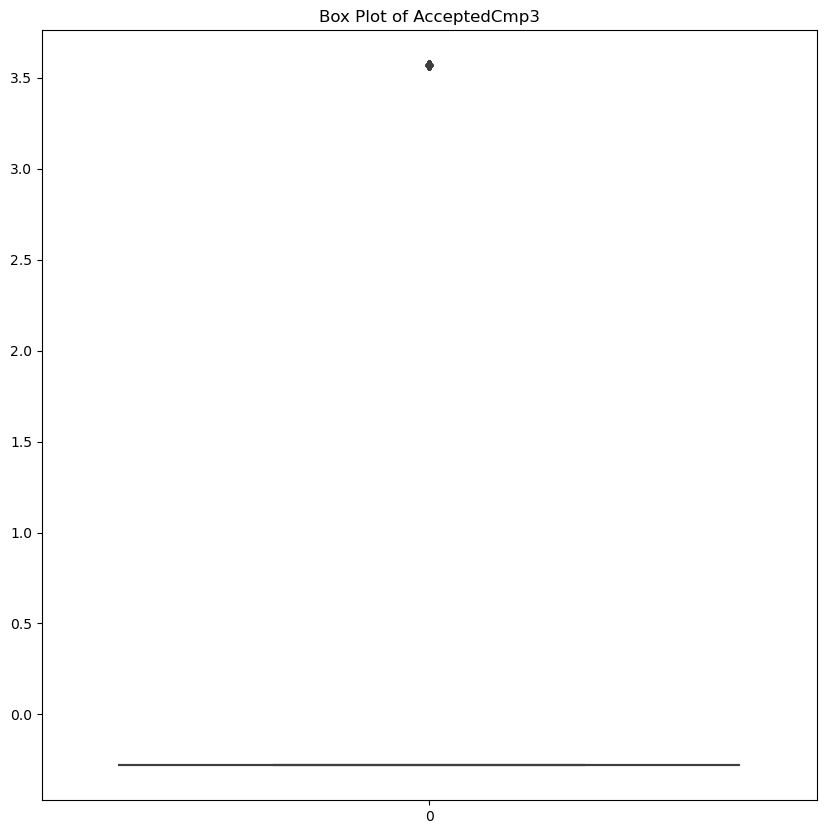

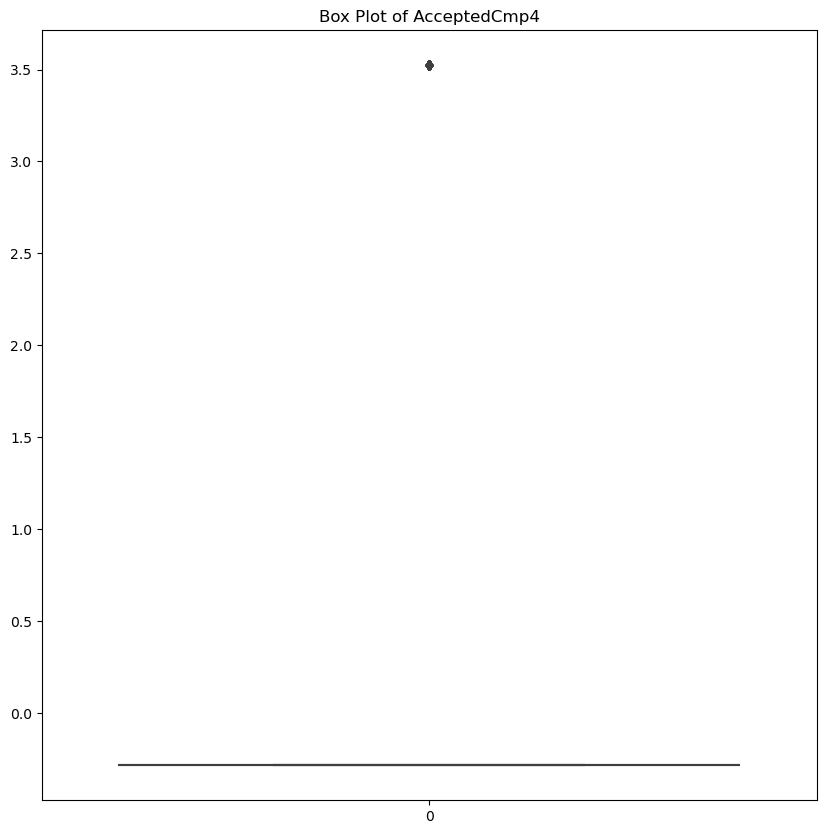

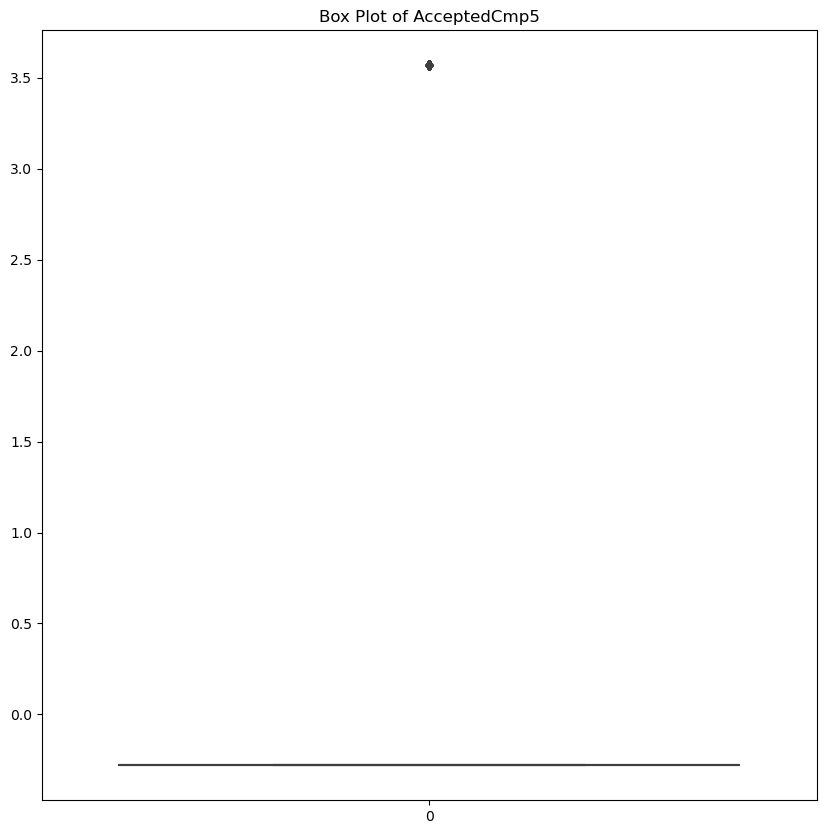

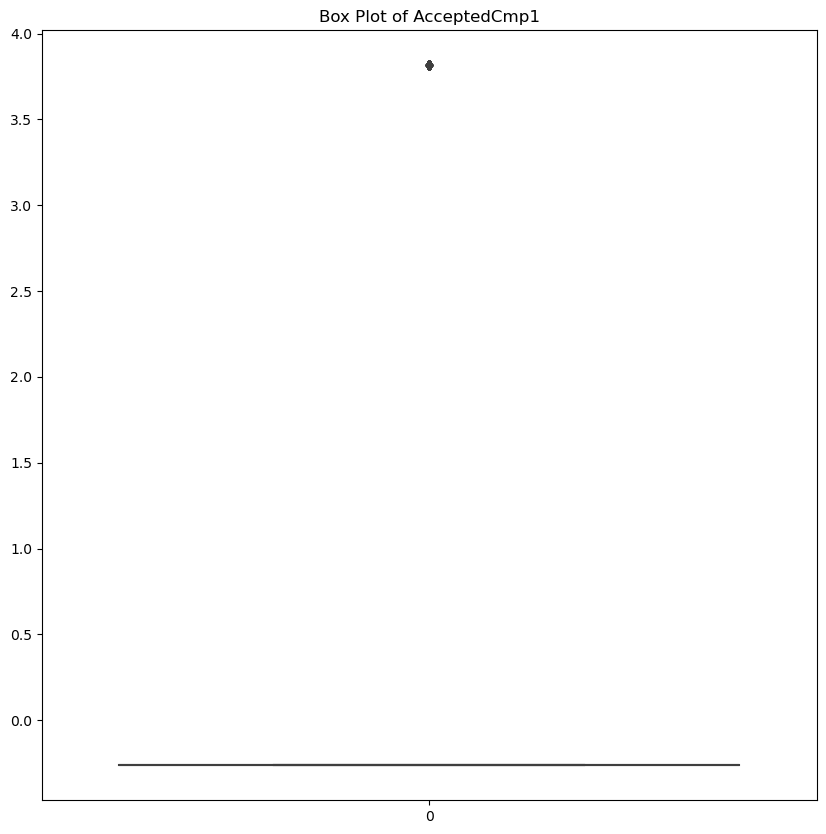

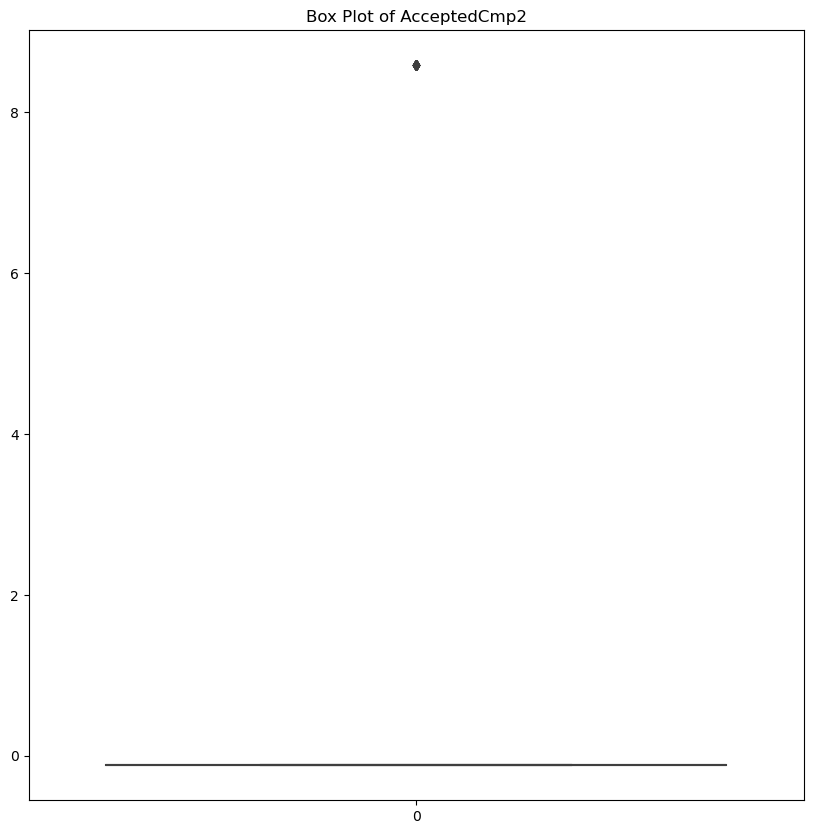

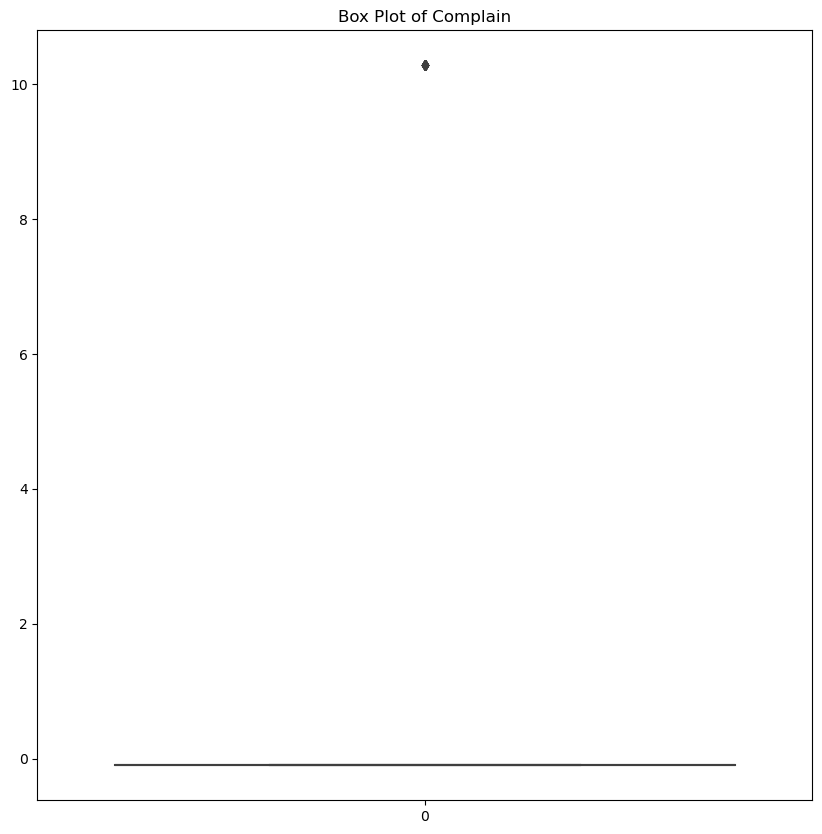

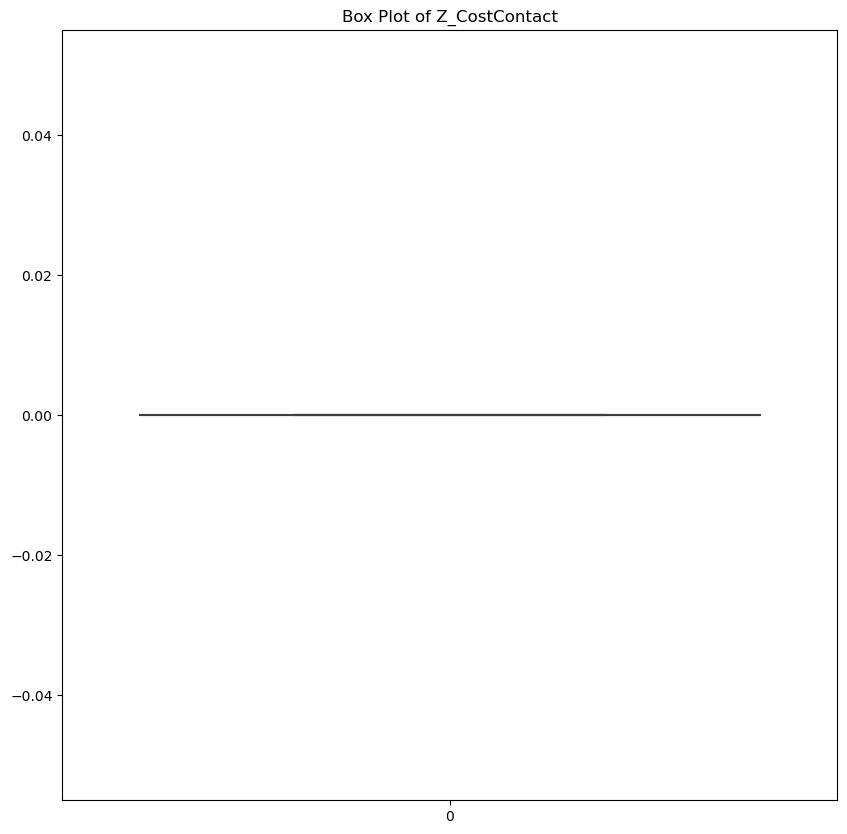

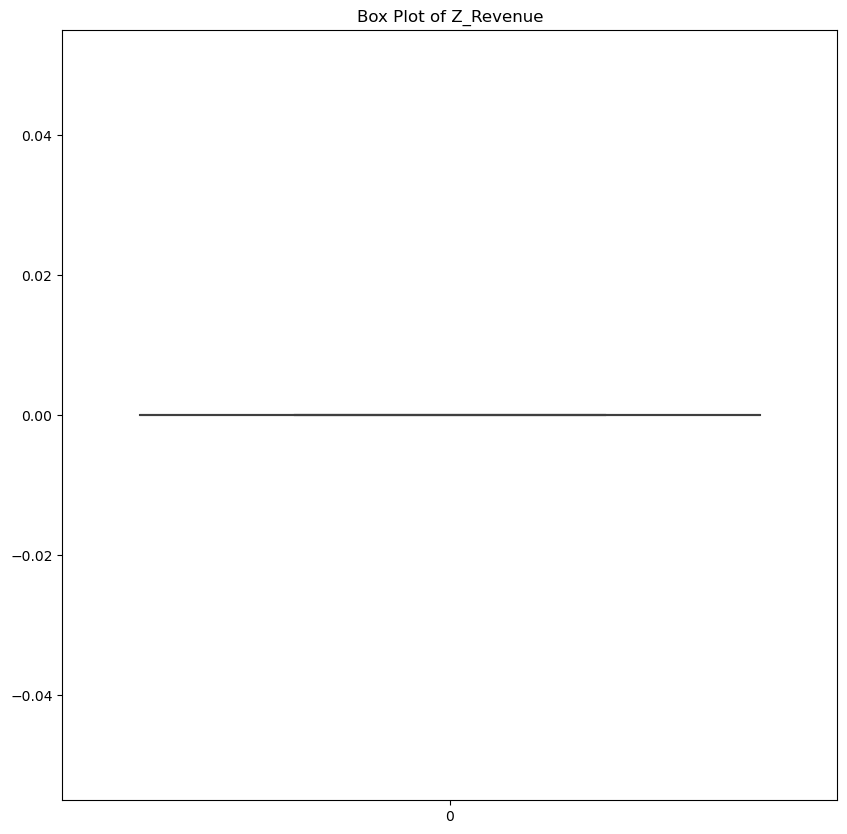

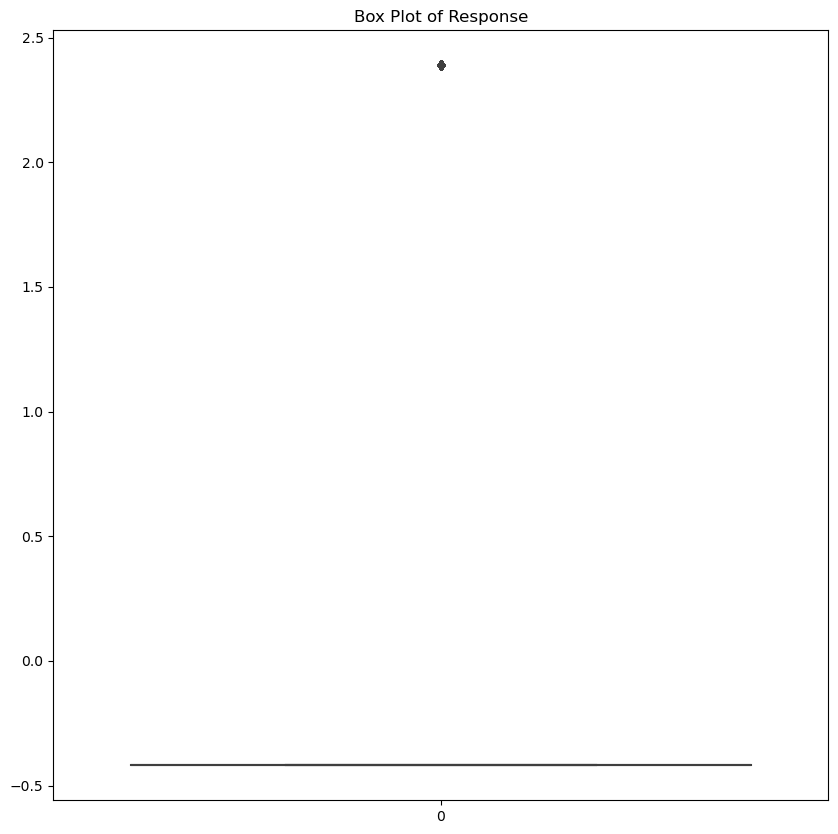

In [34]:
# Box plot to check the outliers

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(10, 10))
        sns.boxplot(df[column])
        plt.title(f"Box Plot of {column}")
        plt.show()

In [35]:
import numpy as np

# Function to remove outliers based on IQR
def remove_outliers_iqr(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

# Remove outliers from DataFrame
df_cleaned = remove_outliers_iqr(df)

print(df_cleaned)

            ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
1    -1.053058   -1.235733          2               4 -0.235454  1.032559   
3     0.181716    1.268149          2               5 -1.022355  1.032559   
7     0.180176    1.351612          4               3 -0.750388  1.032559   
10   -1.108512    1.184687          2               3 -0.034215  1.032559   
11   -1.603592    0.600447          1               3 -1.787205 -0.825218   
...        ...         ...        ...             ...       ...       ...   
2218 -0.232340    0.767373          2               5 -1.176995  1.032559   
2223 -1.276722   -0.484568          3               3 -0.746073  1.032559   
2229  1.383834    0.266596          2               3 -1.110721  2.890335   
2232  0.766447    1.435075          2               4 -1.015564 -0.825218   
2234  0.856406    0.433522          2               3 -0.711758  1.032559   

      Teenhome   Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
1 

In [36]:
# prompt: apply squared root transformation and check the skweness before and after

# Calculate skewness before transformation
skewness_before = df.select_dtypes(include=np.number).skew()
print("Skewness before transformation:\n", skewness_before)

# Apply square root transformation to relevant columns (excluding those with negative values)
df_sqrt_transformed = df.copy()
for column in df_sqrt_transformed.select_dtypes(include=np.number).columns:
  if (df_sqrt_transformed[column] >= 0).all():
    df_sqrt_transformed[column] = np.sqrt(df_sqrt_transformed[column])

# Calculate skewness after transformation
skewness_after = df_sqrt_transformed.select_dtypes(include=np.number).skew()
print("\nSkewness after transformation:\n", skewness_after)

# Compare skewness before and after transformation
skewness_change = skewness_after - skewness_before
print("\nChange in skewness:\n", skewness_change)


Skewness before transformation:
 ID                      0.039832
Year_Birth             -0.349944
Education              -0.283625
Marital_Status          0.167319
Income                  6.800947
Kidhome                 0.635288
Teenhome                0.407115
Recency                -0.001987
MntWines                1.175771
MntFruits               2.102063
MntMeatProducts         2.083233
MntFishProducts         1.919769
MntSweetProducts        2.136081
MntGoldProds            1.886106
NumDealsPurchases       2.418569
NumWebPurchases         1.382794
NumCatalogPurchases     1.880989
NumStorePurchases       0.702237
NumWebVisitsMonth       0.207926
AcceptedCmp3            3.291705
AcceptedCmp4            3.241574
AcceptedCmp5            3.291705
AcceptedCmp1            3.555444
AcceptedCmp2            8.472093
Complain               10.188972
Z_CostContact           0.000000
Z_Revenue               0.000000
Response                1.971555
dtype: float64

Skewness after transformati

In [37]:
# Removing ID column as  It’s a unique identifier and doesn’t contribute to the analysis.

# Drop the 'ID' column
df_cleaned = df_cleaned.drop('ID', axis=1)

# Print the DataFrame to confirm the removal
print(df_cleaned.head())


    Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
1    -1.235733          2               4 -0.235454  1.032559  0.906934   
3     1.268149          2               5 -1.022355  1.032559 -0.929894   
7     1.351612          4               3 -0.750388  1.032559 -0.929894   
10    1.184687          2               3 -0.034215  1.032559 -0.929894   
11    0.600447          1               3 -1.787205 -0.825218 -0.929894   

     Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  \
1  -0.383664 -0.870479  -0.636301        -0.713225  ...          -0.130463   
3  -0.798086 -0.870479  -0.560857        -0.651187  ...           0.281720   
7  -0.590875 -0.677327  -0.409969        -0.491658  ...           1.106087   
10 -1.316114 -0.888309  -0.535709        -0.713225  ...           0.693904   
11  0.341574 -0.885337  -0.259081        -0.691069  ...           1.106087   

    AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
1   

In [38]:
# Applying StandardScaler

from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected numerical columns
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Print the scaled DataFrame
print(df_cleaned.head())


    Year_Birth  Education  Marital_Status    Income   Kidhome  Teenhome  \
1    -1.473864  -0.619161        0.288116  0.911978  0.417987  0.940859   
3     1.213947  -0.619161        1.245943 -0.729319  0.417987 -0.950976   
7     1.303540   1.645544       -0.669710 -0.162056  0.417987 -0.950976   
10    1.124353  -0.619161       -0.669710  1.331717  0.417987 -0.950976   
11    0.497197  -1.751513       -0.669710 -2.324621 -1.523966 -0.950976   

     Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  \
1  -0.455858 -0.585883  -0.501719        -0.670535  ...          -0.845379   
3  -0.878344 -0.585883   0.016393        -0.064158  ...          -0.221766   
7  -0.667101  0.568036   1.052616         1.495095  ...           1.025460   
10 -1.406452 -0.692399   0.189097        -0.670535  ...           0.401847   
11  0.283493 -0.674646   2.088840        -0.453972  ...           1.025460   

    AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
1   

In [39]:
#Now applying NearestNeighbors

from sklearn.neighbors import NearestNeighbors

# Assuming you want to find the 8 nearest neighbors for each data point
knn = NearestNeighbors(n_neighbors=8)
knn.fit(df_cleaned[numerical_cols])

# Get the distances and indices of the nearest neighbors
distances, indices = knn.kneighbors(df_cleaned[numerical_cols])

# Print the results (adjust as needed for your specific use case)
print("Distances:\n", distances)
print("\nIndices:\n", indices)


Distances:
 [[0.00000000e+00 2.34770566e+00 2.38258945e+00 ... 2.56333724e+00
  2.61944421e+00 2.72598388e+00]
 [5.96046448e-08 1.67150635e+00 1.71708830e+00 ... 2.23048893e+00
  2.24444414e+00 2.26971626e+00]
 [0.00000000e+00 2.98633637e+00 3.00540112e+00 ... 3.27605932e+00
  3.32895607e+00 3.41457437e+00]
 ...
 [8.42936970e-08 3.25545157e+00 3.42792363e+00 ... 3.57142062e+00
  3.57142062e+00 3.57686949e+00]
 [5.96046448e-08 1.62188911e+00 2.34829752e+00 ... 2.62804981e+00
  2.66240463e+00 2.67003855e+00]
 [0.00000000e+00 0.00000000e+00 1.23362376e+00 ... 1.64959101e+00
  1.81612032e+00 1.81612032e+00]]

Indices:
 [[  0  29 739 ... 412 109  38]
 [  1 506 242 ... 179 275 564]
 [  2 565 608 ... 654 363 435]
 ...
 [745 636 155 ... 259 710 335]
 [746 367 659 ... 625 616  20]
 [110 747 511 ...  24  41 708]]


In [40]:
# Apply PCA

from sklearn.decomposition import PCA

# Assuming you want to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cleaned[numerical_cols])

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# You can now use pca_df for further analysis or visualization
print(pca_df.head())


       PCA1      PCA2
0 -1.074713 -1.620286
1 -0.758365  1.314658
2  1.348156  0.720080
3 -2.291767  0.353484
4 -0.967008  3.037397


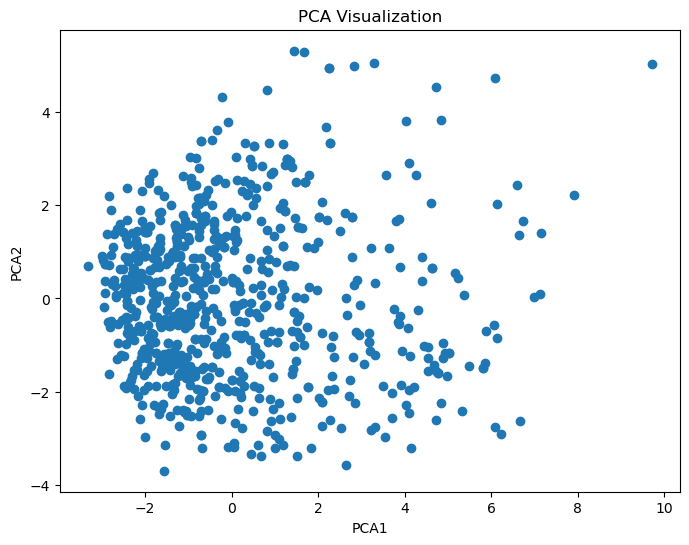

In [41]:
# prompt: Visualize PCA1 AND PCA2

# Visualize PCA1 and PCA2
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Visualization')
plt.show()


In [42]:
# Example of examining PCA loadings:
loadings = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=numerical_cols)
print(loadings)

# This shows how each original variable contributes to the principal components.
# For instance, a high positive loading for 'Income' on PCA1 would support the interpretation of PCA1 as a "wealth" dimension.


                         PCA1      PCA2
Year_Birth          -0.102971  0.347066
Education            0.017450 -0.351097
Marital_Status      -0.011472 -0.044213
Income               0.211160 -0.343058
Kidhome             -0.119312  0.073202
Teenhome             0.110718 -0.412658
Recency              0.033171  0.034935
MntWines             0.367049 -0.215564
MntFruits            0.199351  0.321795
MntMeatProducts      0.365258  0.091732
MntFishProducts      0.181819  0.338314
MntSweetProducts     0.188321  0.335971
MntGoldProds         0.300280  0.172108
NumDealsPurchases    0.273405  0.000012
NumWebPurchases      0.388320  0.016082
NumCatalogPurchases  0.321531 -0.019143
NumStorePurchases    0.348058 -0.073938
NumWebVisitsMonth   -0.011727  0.195669
AcceptedCmp3        -0.000000  0.000000
AcceptedCmp4        -0.000000  0.000000
AcceptedCmp5        -0.000000  0.000000
AcceptedCmp1        -0.000000  0.000000
AcceptedCmp2        -0.000000  0.000000
Complain            -0.000000  0.000000


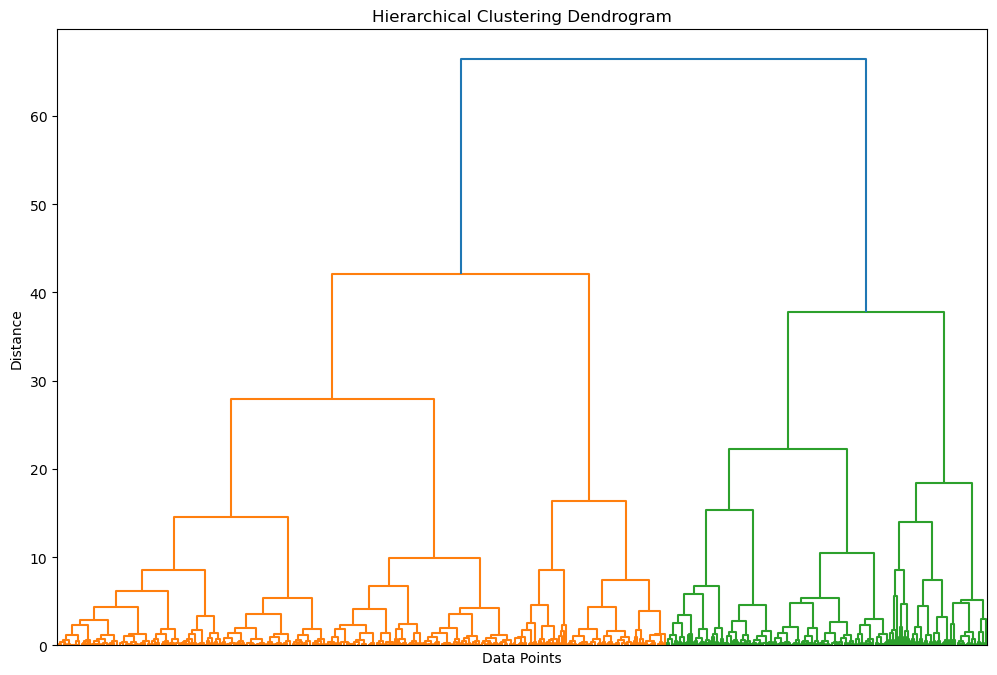

In [43]:
# Performing Hierarchical Clustering

from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate linkage matrix (you can experiment with different methods like 'ward', 'complete', 'average')
linked = linkage(pca_df, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [44]:
# Storing cluster labels in the DataFrame

from sklearn.cluster import AgglomerativeClustering

# Assuming you want to create 3 clusters based on the dendrogram visualization
n_clusters = 3
cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = cluster_model.fit_predict(pca_df)

# Add cluster labels to the DataFrame
pca_df['Cluster'] = cluster_labels


In [45]:
# DataFrame with the new column

# Display the DataFrame with the new column
display(df_cleaned)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,-1.473864,-0.619161,0.288116,0.911978,0.417987,0.940859,-0.455858,-0.585883,-0.501719,-0.670535,...,-0.845379,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.213947,-0.619161,1.245943,-0.729319,0.417987,-0.950976,-0.878344,-0.585883,0.016393,-0.064158,...,-0.221766,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.303540,1.645544,-0.669710,-0.162056,0.417987,-0.950976,-0.667101,0.568036,1.052616,1.495095,...,1.025460,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.124353,-0.619161,-0.669710,1.331717,0.417987,-0.950976,-1.406452,-0.692399,0.189097,-0.670535,...,0.401847,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.497197,-1.751513,-0.669710,-2.324621,-1.523966,-0.950976,0.283493,-0.674646,2.088840,-0.453972,...,1.025460,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,0.676384,-0.619161,1.245943,-1.051862,0.417987,-0.950976,-0.385443,-0.692399,-0.501719,-0.583909,...,1.025460,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,-0.667521,0.513192,-0.669710,-0.153057,0.417987,2.832694,-0.631894,-0.408357,1.398024,-0.410659,...,-1.468992,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2229,0.138822,-0.619161,-0.669710,-0.913629,2.359941,-0.950976,-1.476866,-0.727904,-0.329015,-0.583909,...,0.401847,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2232,1.393134,-0.619161,0.288116,-0.715154,-1.523966,-0.950976,-0.033372,-0.692399,-0.501719,-0.670535,...,-1.468992,0.0,-1.110223e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Silhouette Score: 0.37829001329522227
Calinski-Harabasz Index: 481.60080172961517
Davies-Bouldin Index: 0.8701928004369975


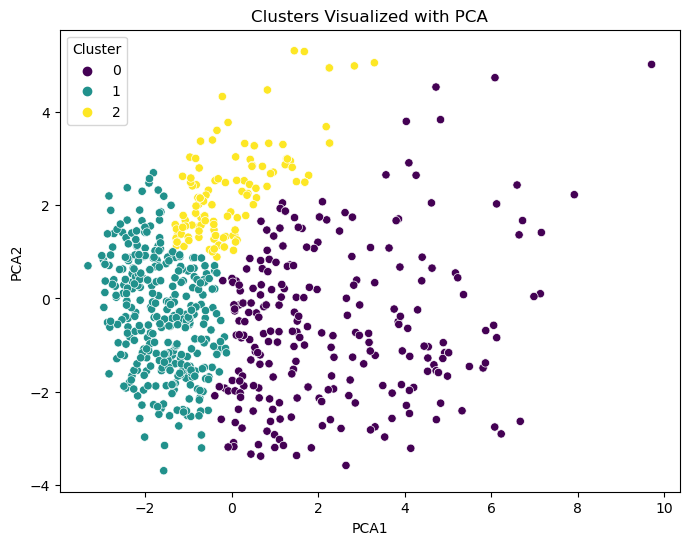

In [46]:
# Calculating clustering scores and visualizing them

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pca_df contains the PCA-transformed data and cluster_labels contains the cluster assignments

# Calculate clustering scores
silhouette = silhouette_score(pca_df, cluster_labels)
calinski_harabasz = calinski_harabasz_score(pca_df, cluster_labels)
davies_bouldin = davies_bouldin_score(pca_df, cluster_labels)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Ensure PCA results and cluster labels are added to the DataFrame
df_cleaned = pca_df.copy()
df_cleaned['Cluster'] = cluster_labels

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_cleaned, palette='viridis')
plt.title('Clusters Visualized with PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()



In [47]:
# Storing important scores in a dictionary

# Store scores in a dictionary
scores = {
    "Silhouette Score": silhouette,
    "Calinski-Harabasz Index": calinski_harabasz,
    "Davies-Bouldin Index": davies_bouldin
}

# Print the scores dictionary
print(scores)


{'Silhouette Score': 0.37829001329522227, 'Calinski-Harabasz Index': 481.60080172961517, 'Davies-Bouldin Index': 0.8701928004369975}


In [48]:
#Model Building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'Cluster' is the target variable and df_cleaned contains the features
X = df_cleaned.drop('Cluster', axis=1)
y = df_cleaned['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       0.96      0.96      0.96        73
           2       0.96      0.90      0.93        30

    accuracy                           0.96       150
   macro avg       0.96      0.95      0.96       150
weighted avg       0.96      0.96      0.96       150

Confusion Matrix:
 [[47  0  0]
 [ 2 70  1]
 [ 0  3 27]]


--- Decision Tree ---
Accuracy: 0.9933333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.99      0.99        73
           2       1.00      1.00      1.00        30

    accuracy                           0.99       150
   macro avg       0.99      1.00      0.99       150
weighted avg       0.99      0.99      0.99       150

Confusion Matrix:
 [[47  0  0]
 [ 1 72

In [49]:
# Fine-tune the SVM model to which could potentially improve performance further using techniques like Grid Search or Random Search.

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

# Evaluate the best SVM model on the test set
y_pred = best_svm.predict(X_test)
print("--- Best SVM Model ---")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Best SVM Model ---
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        30

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Confusion Matrix:
 [[47  0  0]
 [ 0 73  0]
 [ 0  0 30]]


In [50]:
# Model Validation

from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., 5-fold)
cv_scores = cross_val_score(best_svm, X, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())



Cross-Validation Scores: [0.99333333 1.         1.         0.97315436 0.99328859]
Mean CV Score: 0.9919552572706936


In [51]:
#Model Validation on Test Set

# Assuming 'best_svm' is your trained SVM model and X_test, y_test are your test data
y_pred = best_svm.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Test Set Performance:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)



Test Set Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        30

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Confusion Matrix:
 [[47  0  0]
 [ 0 73  0]
 [ 0  0 30]]


In [52]:
# Deployment

In [74]:
import pickle
# Model can not be saved into readable format. It will be converted to binary format.
# Model conversion into binary format is called as pickling or serialization.

In [76]:
pickle.dump(grid_search,open('grid_search.pkl','wb'))
# dump() will save the model. Pass model name to function,
# open pickle file in write binary mode. File name can be any thing with. pkl extension i.e. clf.pkl
# once this code is run, clf.pkl file will be created automatically & it will be saved in current working
# We need this grid_search.pkl file only for deployment purpose.

In [77]:
import joblib

# Assuming 'best_svm' is your final model
joblib.dump(best_svm, 'best_svm_model.pkl')


['best_svm_model.pkl']

In [78]:
# api.py

from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the trained model
model = joblib.load('best_svm_model.pkl')

# Initialize Flask app
app = Flask(__name__)

# Function to preprocess the data
def preprocess_data(data):
    # Convert data to DataFrame
    df = pd.DataFrame(data, columns=['Age', 'Income', 'Purchases'])
    
    # Apply scaling
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    # PCA transformation
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df_scaled)
    
    return df_pca

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['data']
    processed_data = preprocess_data(data)
    prediction = model.predict(processed_data)
    return jsonify({'segment': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [79]:
python api.py


SyntaxError: invalid syntax (637804160.py, line 1)

In [80]:
# app.py

import streamlit as st
import requests
import pandas as pd

# Function to call the API and get prediction
def get_prediction(data):
    url = 'http://localhost:5000/predict'
    response = requests.post(url, json={'data': data})
    return response.json()

st.title("Customer Segmentation Prediction")

# Input fields for interactive testing
st.header("Interactive Prediction")
age = st.number_input("Enter Age", min_value=0, max_value=100, value=25)
income = st.number_input("Enter Income", min_value=0, value=50000)
purchases = st.number_input("Number of Purchases", min_value=0, value=10)

if st.button("Predict Segment"):
    data = [[age, income, purchases]]
    result = get_prediction(data)
    segment = result['segment'][0]
    st.write(f"The customer is in segment: {segment}")


In [81]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)